# Data Scientist - Credit Risk Prediction


  - Fnal Project at ID/X Partners
  - Credit Risk Prediction by Using Machine Learning
  - Author : Oknardo Budi Setiawan Tulung

# 1. Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Processing
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Tambahan untuk Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier




# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Hyperparameter Tuning and Cross-Validation
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Pipeline (Jika diperlukan)
from sklearn.pipeline import Pipeline

# Saving and Loading Models
import joblib


# 2. Importing Dataset

In [2]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path file CSV di Google Drive
file_path = '/content/drive/My Drive/PBI IDX Partners/loan_data_2007_2014.csv'

# Membaca file CSV menggunakan pandas
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Data Understanding

## 3.1 Dataset Overview

In [3]:
# Menampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**Information:**

- Dataset memiliki 75 kolom
- Dataset memiliki 466.285 baris
- emp_title: 27,588 mssing value (sekitar 5.9%)
- emp_length: 21,008 missing value (sekitar 4.5%)
- desc: 340,304 missing value (sekitar 73%)
- mths_since_last_delinq: 250,351 mssing value (sekitar 53.7%)
- mths_since_last_record: 403,647 missing value (sekitar 86.6%)
- next_pymnt_d: 227,214 missing value (sekitar 48.7%)
- mths_since_last_major_derog: 367,311 mssing value (sekitar 78.8%)
- annual_inc_joint, dti_joint, verification_status_joint: Semua data missing value
- Kolom-kolom seperti open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m: semua data missing value

## 3.2 Statistic Descriptive




In [4]:
# Menampilkan statistik deskriptif untuk setiap kolom numerik
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


Insights:
- Loan Amount: Sebagian besar pinjaman berkisar antara 8,000 hingga 20,000, dengan rata-rata 14,317.

- Interest Rate: Suku bunga rata-rata adalah 13.83%, dengan sebagian besar pinjaman memiliki suku bunga antara 10.99% hingga 16.49%.

- Annual Income: Pendapatan tahunan rata-rata peminjam adalah 73,277 dengan rentang signifikan dari 1,896 hingga 7,500,000 (kemungkinan outlier).

- Debt-to-Income Ratio: Rasio DTI rata-rata adalah 17.22, yang menunjukkan sebagian besar peminjam memiliki beban utang yang cukup seimbang dibandingkan dengan pendapatan mereka

- Delinquencies: Sebagian besar peminjam tidak memiliki tunggakan dalam 2 tahun terakhir, dengan rata-rata 0.28 insiden.

- Recoveries: Nilai recoveries rata-rata adalah 85.34, namun ada beberapa kasus dengan recoveries sangat tinggi hingga 33,520.

- Open Accounts: Rata-rata peminjam memiliki 11 akun kredit terbuka.
Revolving Credit Limit: Saldo kredit bergulir rata-rata adalah 30,379, dengan beberapa outlier yang sangat tinggi hingga 9,999,999.

## 3.3 Define Target

In [5]:
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


- Untuk mendefinisikan target dalam prediksi risiko kredit (credit risk), kita perlu terlebih dahulu menentukan apa yang akan dijadikan target atau label dalam model machine learning. Dalam konteks prediksi risiko kredit, target biasanya adalah status pinjaman, yang menunjukkan apakah pinjaman tersebut berisiko atau tidak.


- Target: **loan_status**

  Kolom loan_status biasanya kategori seperti "Fully Paid" (lunas), "Charged Off" (pinjaman gagal bayar), "Default", dan lain-lain. Untuk model prediksi risiko kredit, target bisa diubah menjadi variabel biner:

  - 1 untuk pinjaman yang tidak berisiko
  - 0 untuk pinjaman berisiko

In [6]:
# Daftar status pinjaman yang dianggap sebagai good loan
good_loan_status = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period']

# Menentukan loan_status_probability: 1 untuk good loan, 0 untuk risk
df['loan_status_probability'] = np.where(df['loan_status'].isin(good_loan_status), 1, 0)

# Melihat distribusi dari kategori baru
print(df['loan_status_probability'].value_counts())

loan_status_probability
1    414099
0     52186
Name: count, dtype: int64


# 4. Exploratory Data Analysis

In [7]:
# Pengelompokkan Feature
num = df.select_dtypes(include=['float64', 'int64']).columns  # Fitur Numerik
cat = df.select_dtypes(include=['object']).columns  # Fitur Kategorikal

## 4.1 Feature Numerical

In [8]:
# Melihat jumlah value pada feature numerical
for column in df[num].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'Unnamed: 0':
Unnamed: 0
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: count, Length: 466285, dtype: int64


Value counts for column 'id':
id
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: count, Length: 466285, dtype: int64


Value counts for column 'member_id':
member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64


Value counts for column 'loan_amnt':
loan_amnt
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: count, Length: 1352, dtype: int64


Value counts for column 'funded_amnt':
funded

In [9]:
# Deskripsi Feature Numerical
df[num].describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status_probability
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0,466285.000000
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN,0.888081
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN,0.315267
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN,1.000000
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN,1.000000
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN,1.000000
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN,1.000000


Insights:
- Loan Amount memiliki rata-rata sebesar Rp14,317,000, dengan sebagian besar pinjaman berada di kisaran Rp8,000,000 hingga Rp20,000,000.

- Interest Rate memiliki rata-rata 13.83%, dengan rentang yang cukup lebar dari 5.42% hingga 26.06%, mencerminkan perbedaan risiko kredit di antara peminjam.

- Installment memiliki rata-rata sebesar Rp432,060 per bulan, dengan pembayaran minimum Rp15,670 dan maksimum Rp1,409,990.

- Annual Income memiliki rata-rata sebesar Rp73,277,000, namun terdapat outlier dengan penghasilan yang sangat tinggi, mencapai Rp7,500,000,000.

- Debt-to-Income Ratio (DTI) memiliki rata-rata 17.22, dengan rasio tertinggi mencapai 39.99, memberikan indikasi beban utang relatif terhadap pendapatan peminjam.


## 4.2 Feature Category

In [10]:
# Melihat jumlah value pada kolom categorical
for column in df[cat].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'term':
term
 36 months    337953
 60 months    128332
Name: count, dtype: int64


Value counts for column 'grade':
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64


Value counts for column 'sub_grade':
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64


Value counts for column 'emp_title':
emp_title
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                      

In [11]:
# Deskripsi Feature Categorical
df[cat].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


Insights:

- Term: Sebagian besar pinjaman memiliki jangka waktu 36 bulan, dengan 337,953 entri (sekitar 72.5%) berada dalam kategori ini.
- Grade: Mayoritas pinjaman diberikan dengan grade 'B', yang mencakup 136,929 entri (sekitar 29.4%).
- Sub_grade: Subgrade paling umum adalah 'B3', dengan 31,686 entri.
- Emp_title: 'Teacher' adalah pekerjaan paling umum, dengan 5,399 entri, namun ada 205,475 pekerjaan unik yang dilaporkan.
- Emp_length: Masa kerja paling umum adalah 10+ tahun, dengan 150,049 entri.
- Home_ownership: Sebagian besar peminjam memiliki status kepemilikan rumah 'MORTGAGE', mencakup 235,875 entri (sekitar 50.6%).
- Verification_status: Status verifikasi yang paling umum adalah 'Verified', dengan 168,055 entri.
- Issue_d: Bulan penerbitan pinjaman paling umum adalah Oktober 2014, dengan 38,782 entri.
- Loan_status: Status pinjaman paling umum adalah 'Current', dengan 224,226 entri (sekitar 48.1%).
- Purpose: Alasan paling umum untuk pinjaman adalah 'Debt Consolidation', dengan 274,195 entri (sekitar 58.8%).


## 4.3 Univariate Analysis

In [12]:
len(num)

54

In [13]:
len(cat)

22

In [14]:
# Mengelompokkan kolom numerik dan kategorikal
num = df.select_dtypes(include=['float64', 'int64']).columns
cat = df.select_dtypes(include=['object']).columns

# Mencetak kolom numerik
print("Kolom Numerik:")
print(num)

# Mencetak kolom kategorikal
print("\nKolom Kategorikal:")
print(cat)

Kolom Numerik:
Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'loan_stat

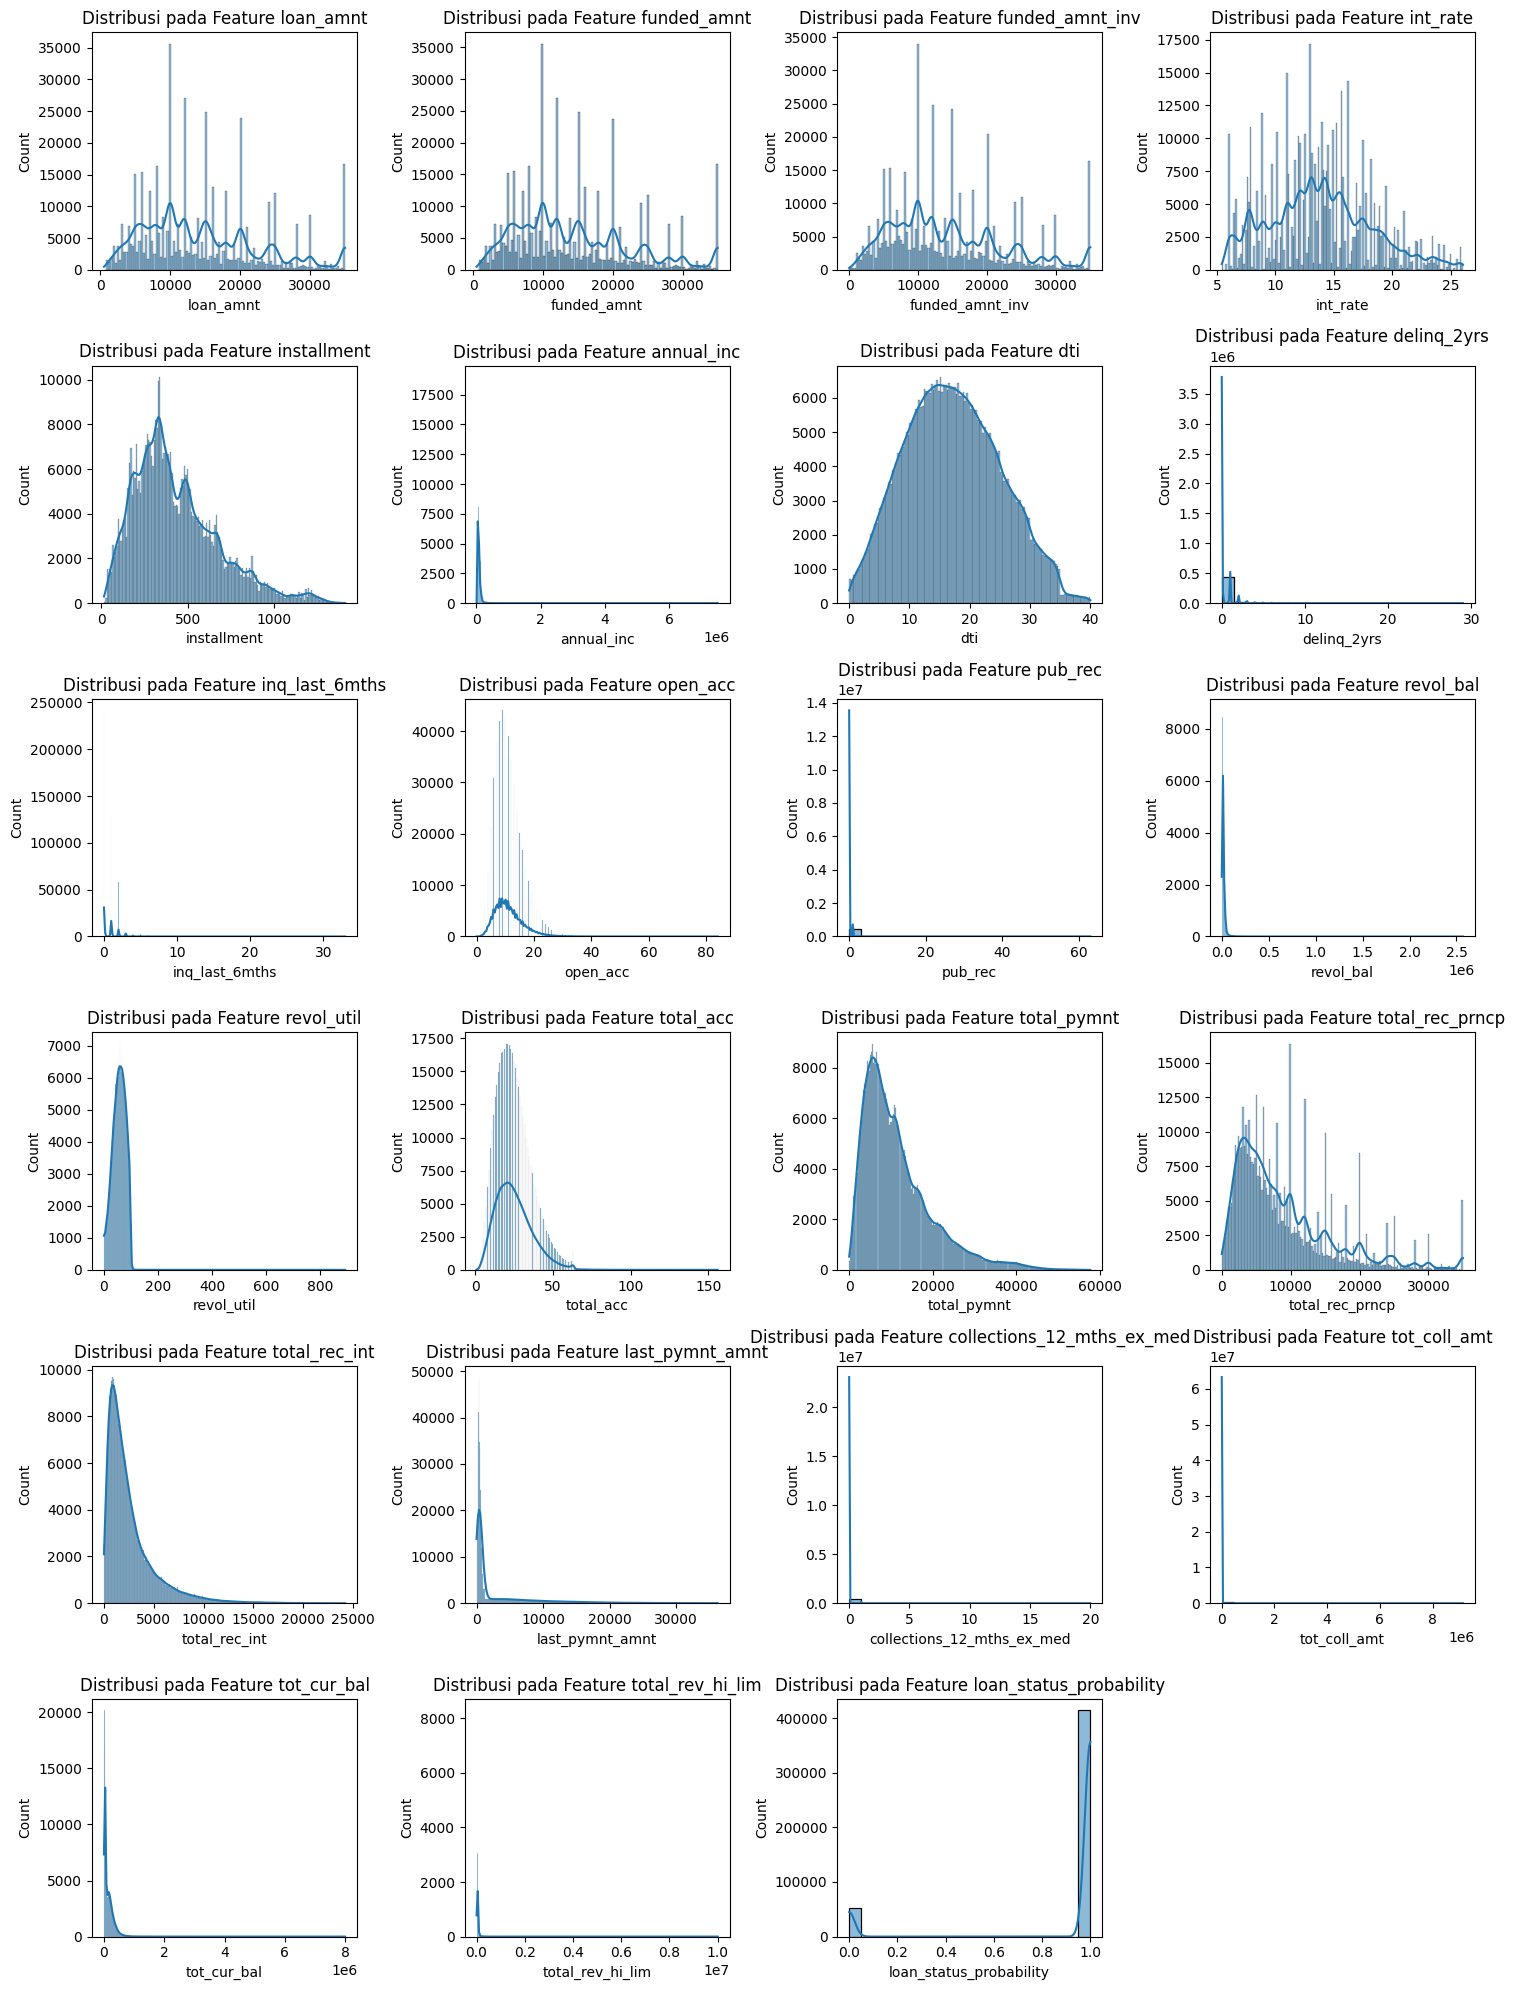

In [15]:
# Distribusi feature numerik
selected_numerical_features = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
    'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
    'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
    'total_rev_hi_lim', 'loan_status_probability'
]

plt.figure(figsize=(15, 20))
for i in range(len(selected_numerical_features)):
    plt.subplot(6, 4, i + 1)
    sns.histplot(df[selected_numerical_features[i]], kde=True, palette="Set2")
    plt.title(f'Distribusi pada Feature {selected_numerical_features[i]}')
    plt.tight_layout()

plt.show()

Insights:
 - Fitur-fitur seperti Loan Amount, Funded Amount, Funded Amount Inv, Installment, Annual Income, DTI, Total Payment, dan Total Rec Principal menunjukkan distribusi yang secara jelas skewed ke kanan (positively skewed)

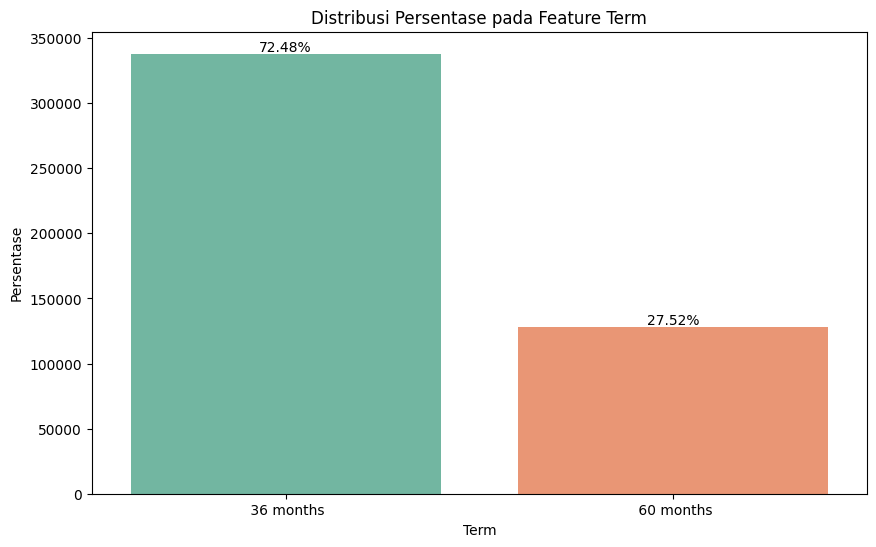

In [16]:
# Membuat plot distribusi persentase untuk fitur 'term'
plt.figure(figsize=(10, 6))
total = float(len(df))  # total jumlah data
ax = sns.countplot(x='term', data=df, palette="Set2")
plt.title('Distribusi Persentase pada Feature Term')
plt.xlabel('Term')
plt.ylabel('Persentase')

# Menambahkan persentase di atas setiap bar dengan spasi lebih
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1500, '{:1.2f}%'.format(height/total * 100), ha="center")

plt.xticks(rotation=0)
plt.show()

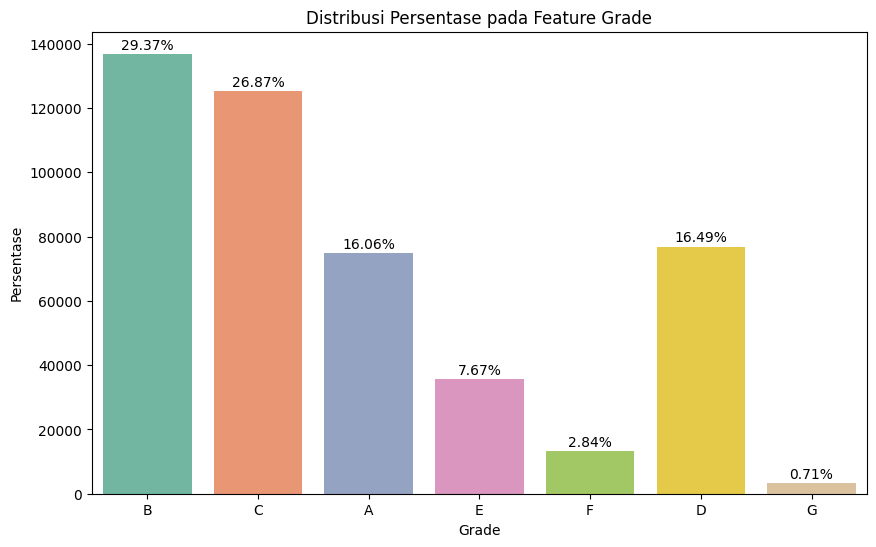

In [17]:
# Membuat plot distribusi persentase untuk fitur 'grade'
plt.figure(figsize=(10, 6))
total = float(len(df))  # total jumlah data
ax = sns.countplot(x='grade', data=df, palette="Set2")
plt.title('Distribusi Persentase pada Feature Grade')
plt.xlabel('Grade')
plt.ylabel('Persentase')

# Menambahkan persentase di atas setiap bar dengan spasi lebih
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1500, '{:1.2f}%'.format(height/total * 100), ha="center")

plt.xticks(rotation=0)
plt.show()

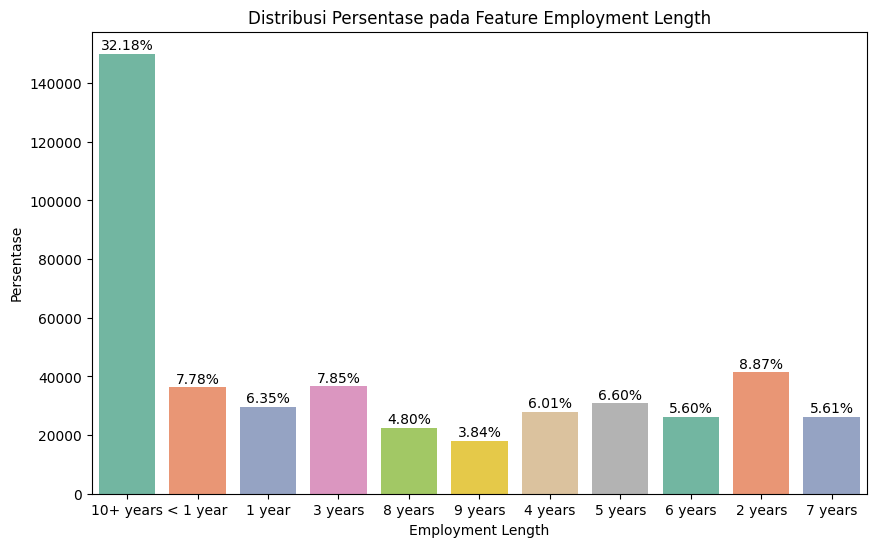

In [18]:
# Membuat plot distribusi persentase untuk fitur 'emp_length'
plt.figure(figsize=(10, 6))
total = float(len(df))  # total jumlah data
ax = sns.countplot(x='emp_length', data=df, palette="Set2")
plt.title('Distribusi Persentase pada Feature Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Persentase')

# Menambahkan persentase di atas setiap bar dengan spasi lebih
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1500, '{:1.2f}%'.format(height/total * 100), ha="center")

plt.xticks(rotation=0)
plt.show()


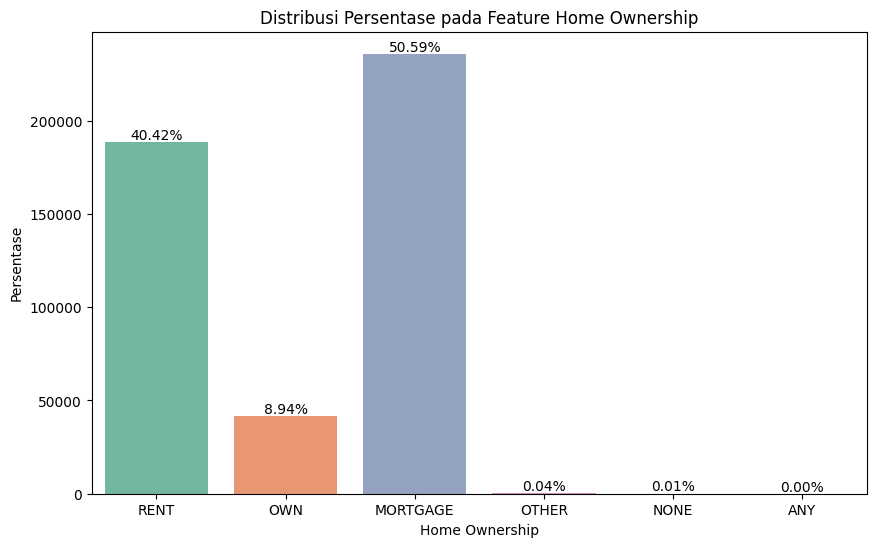

In [19]:
# Membuat plot distribusi persentase untuk fitur 'home_ownership'
plt.figure(figsize=(10, 6))
total = float(len(df))  # total jumlah data
ax = sns.countplot(x='home_ownership', data=df, palette="Set2")
plt.title('Distribusi Persentase pada Feature Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Persentase')

# Menambahkan persentase di atas setiap bar dengan spasi lebih
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1500, '{:1.2f}%'.format(height/total * 100), ha="center")

plt.xticks(rotation=0)
plt.show()


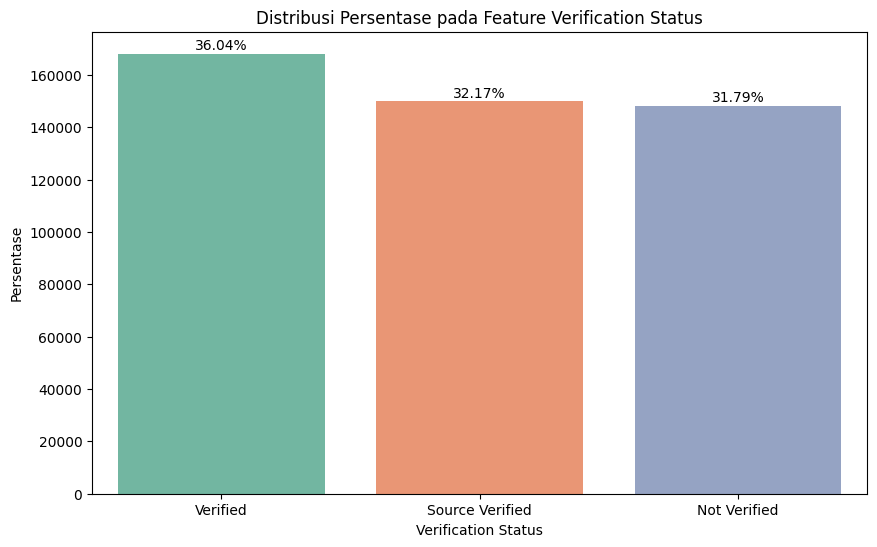

In [20]:
# Membuat plot distribusi persentase untuk fitur 'verification_status'
plt.figure(figsize=(10, 6))
total = float(len(df))  # total jumlah data
ax = sns.countplot(x='verification_status', data=df, palette="Set2")
plt.title('Distribusi Persentase pada Feature Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Persentase')

# Menambahkan persentase di atas setiap bar dengan spasi lebih
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1500, '{:1.2f}%'.format(height/total * 100), ha="center")

plt.xticks(rotation=0)
plt.show()


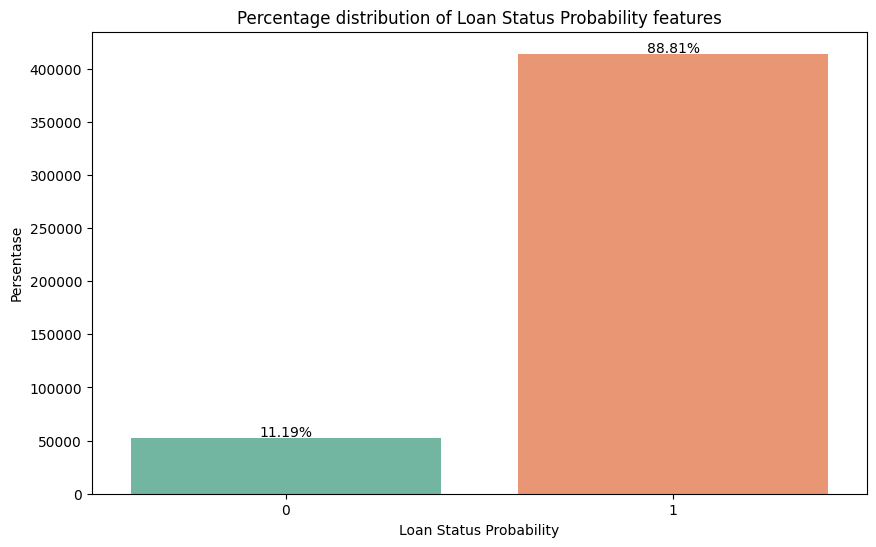

In [21]:
# Membuat plot distribusi persentase untuk fitur 'loan_status_probability'
plt.figure(figsize=(10, 6))
total = float(len(df))  # total jumlah data
ax = sns.countplot(x='loan_status_probability', data=df, palette="Set2")
plt.title('Percentage distribution of Loan Status Probability features')
plt.xlabel('Loan Status Probability')
plt.ylabel('Persentase')

# Menambahkan persentase di atas setiap bar dengan spasi lebih
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1500, '{:1.2f}%'.format(height/total * 100), ha="center")

plt.xticks(rotation=0)
plt.show()

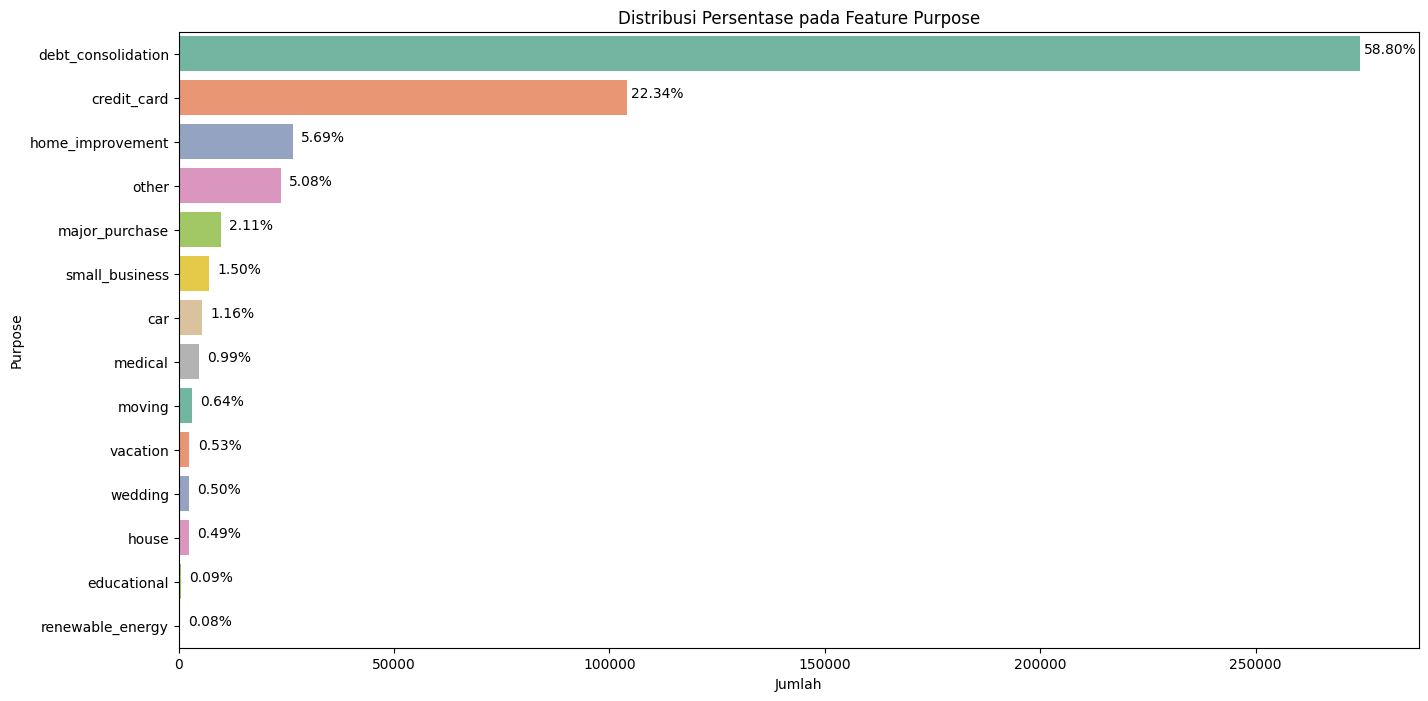

In [22]:
purpose_order = df['purpose'].value_counts().index

# Membuat plot distribusi persentase untuk fitur 'purpose' dengan batang horizontal yang diurutkan
plt.figure(figsize=(16, 8))  # Lebih lebar pada ukuran plot
total = float(len(df))  # Total jumlah data
ax = sns.countplot(y='purpose', data=df, palette="Set2", orient='h', order=purpose_order)
plt.title('Distribusi Persentase pada Feature Purpose')
plt.xlabel('Jumlah')
plt.ylabel('Purpose')

# Menambahkan persentase di sebelah kanan setiap bar dengan jarak lebih jauh dari bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 7000, p.get_y() + p.get_height() / 2., '{:1.2f}%'.format(width/total * 100), ha="center")

plt.xticks(rotation=0)
plt.show()

## 4.4 Bivariate Analysis

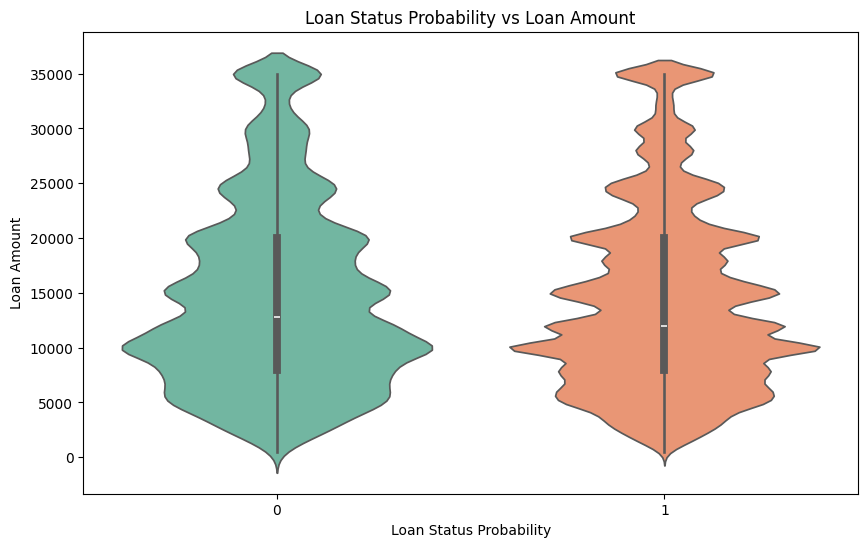

In [23]:

# Violin Plot untuk Loan Status Probability vs Loan Amount
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status_probability', y='loan_amnt', data=df, palette='Set2')
plt.title('Loan Status Probability vs Loan Amount')
plt.xlabel('Loan Status Probability')
plt.ylabel('Loan Amount')
plt.show()

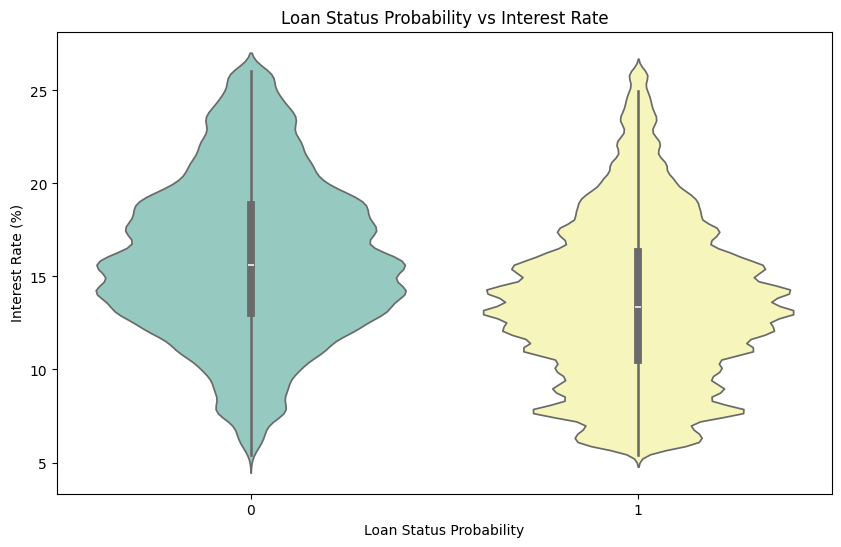

In [24]:
# Violin Plot untuk Loan Status Probability vs Interest Rate
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status_probability', y='int_rate', data=df, palette='Set3')
plt.title('Loan Status Probability vs Interest Rate')
plt.xlabel('Loan Status Probability')
plt.ylabel('Interest Rate (%)')
plt.show()

In [25]:
import numpy as np

# Menghitung IQR (Interquartile Range)
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi Outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat DataFrame baru tanpa outlier
df_income_outlier = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]


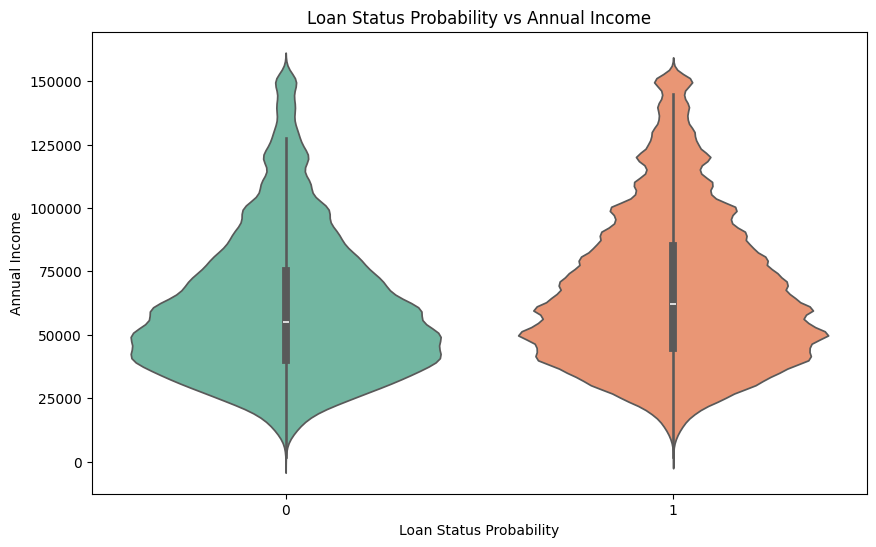

In [26]:
# Violin Plot untuk Loan Status Probability vs Annual Income tanpa outlier
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status_probability', y='annual_inc', data=df_income_outlier, palette='Set2')
plt.title('Loan Status Probability vs Annual Income')
plt.xlabel('Loan Status Probability')
plt.ylabel('Annual Income')
plt.show()

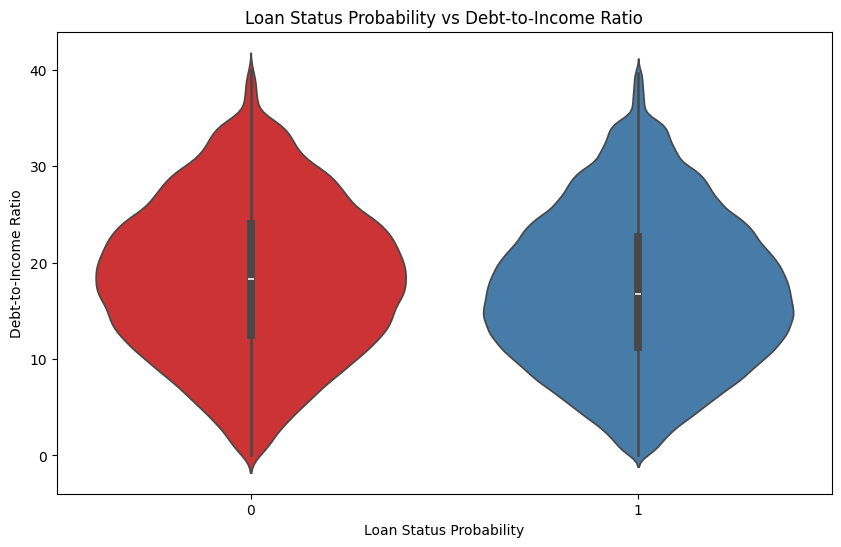

In [27]:
# Violin Plot untuk Loan Status Probability vs Debt-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status_probability', y='dti', data=df, palette='Set1')
plt.title('Loan Status Probability vs Debt-to-Income Ratio')
plt.xlabel('Loan Status Probability')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

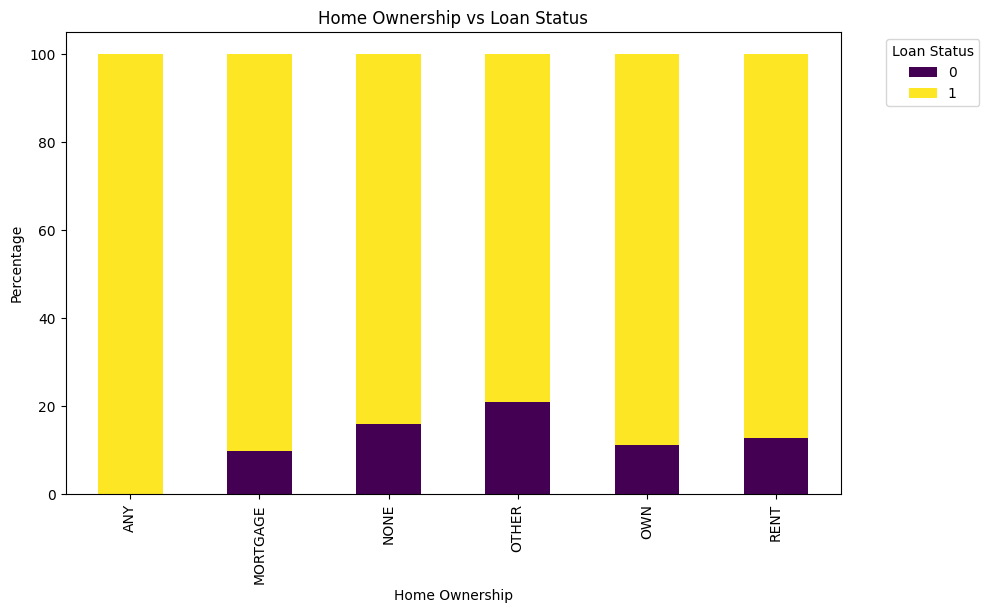

In [28]:
# Crosstab Home Ownership vs Loan Status
home_ownership_vs_status = pd.crosstab(df['home_ownership'], df['loan_status_probability'], normalize='index') * 100

# Plot
home_ownership_vs_status.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

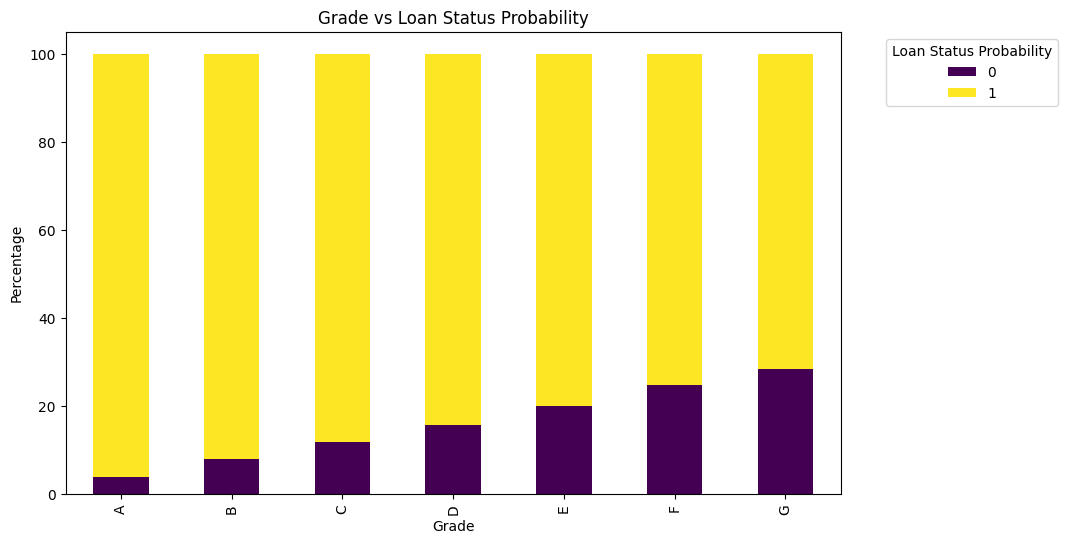

In [29]:
# Crosstab Grade vs Loan Status Probability
grade_vs_prob = pd.crosstab(df['grade'], df['loan_status_probability'], normalize='index') * 100

# Plot
grade_vs_prob.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Grade vs Loan Status Probability')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.legend(title='Loan Status Probability', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


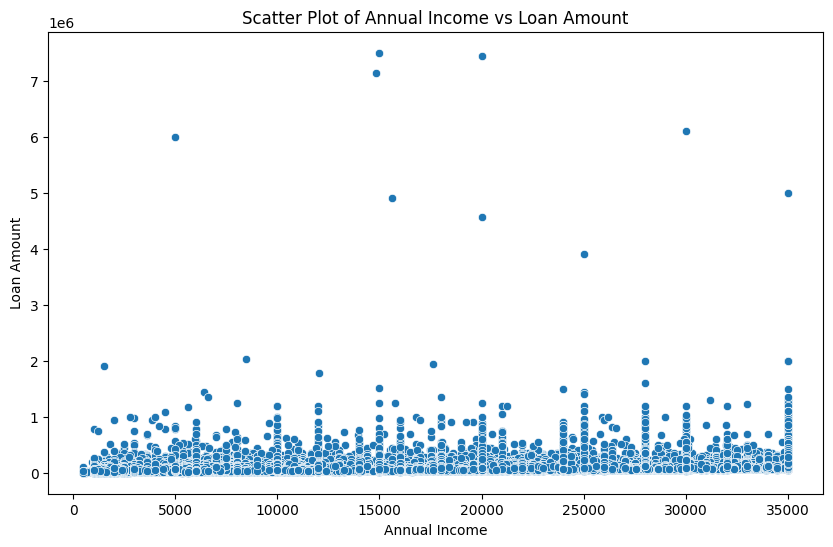

In [30]:
# Scatter Plot annual_inc vs loan_amnt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=df)
plt.title('Scatter Plot of Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

## 4.5 Multivariate Analysis

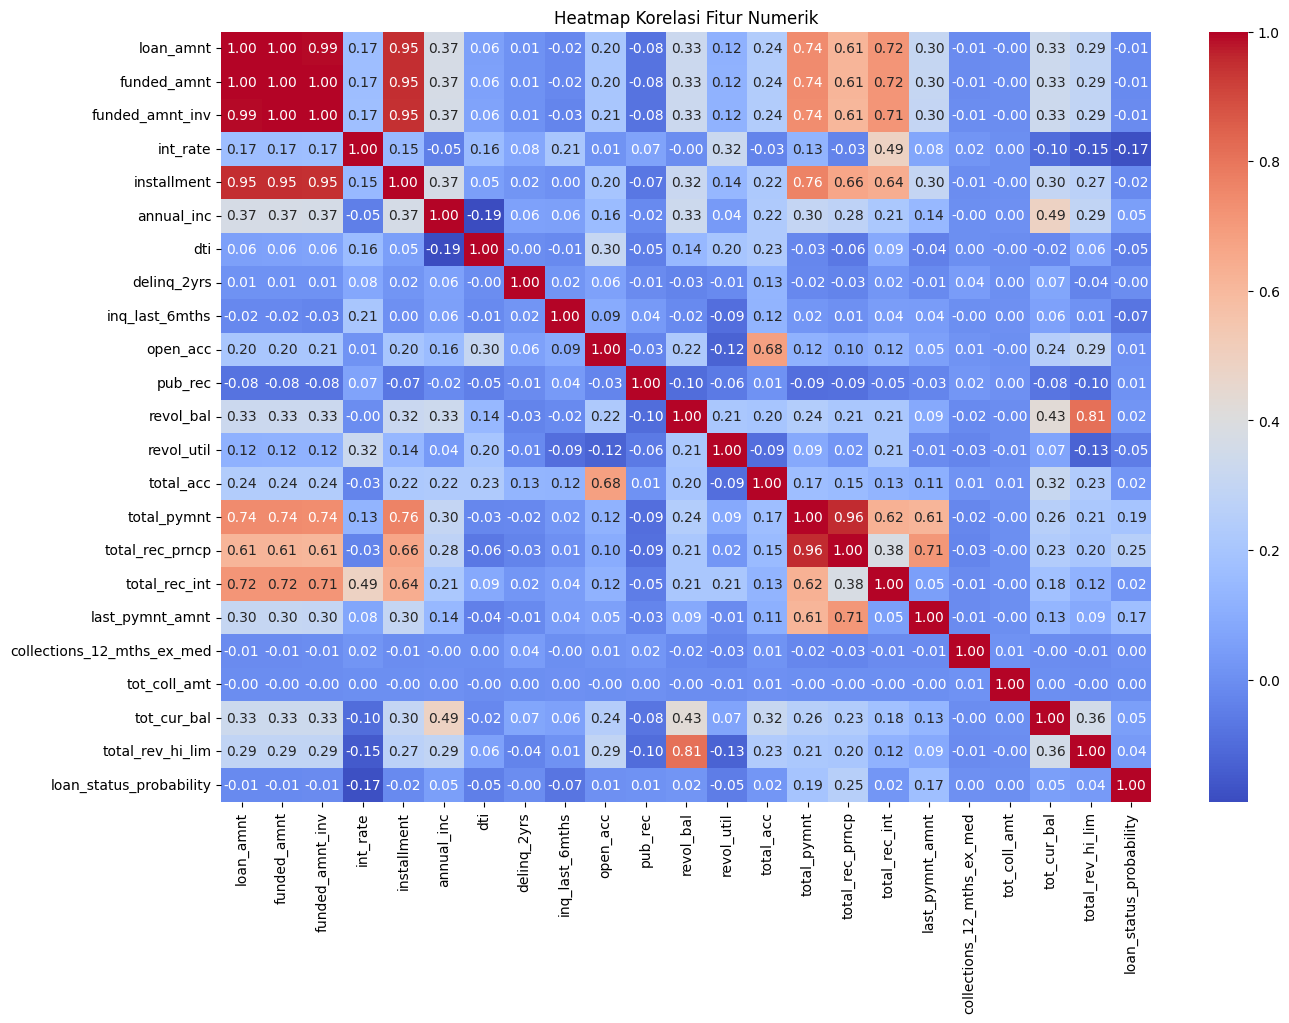

In [31]:
corr_matrix = df[selected_numerical_features].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

Insights:

  - Fitur Redundan: loan_amnt, funded_amnt, dan funded_amnt_inv memiliki korelasi hampir 1 bisa menimbulkan redundansi.

  - total_pymnt, total_rec_prncp, dan total_rec_int sangat berkorelasi (>0.9).

  - Korelasi Negatif: revol_util dan total_rev_hi_lim memiliki korelasi negatif (-0.81), menunjukkan bahwa batas kredit yang lebih tinggi terkait dengan utilisasi kredit yang lebih rendah.

  - Korelasi Rendah: loan_status_probability memiliki korelasi rendah dengan sebagian besar fitur

  - Beberapa fitur sangat berkorelasi, hal ini dapat menyebabkan adanya Multikolinearitas.

# 5. Data Preparation

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## 5.1 Drop Unnescessary Column

In [33]:
# Menghapus semua kolom yang seluruh nilainya adalah null
df.dropna(axis=1, how='all', inplace=True)

In [34]:
# Menghapus kolom berisi unique id
df.drop(columns=['id', 'member_id', 'Unnamed: 0', 'url', 'desc'], inplace=True)

In [35]:
# Drop kolom yang memiliki banyak unique value
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

,0
emp_title,205475
title,63098
zip_code,888
earliest_cr_line,664
last_credit_pull_d,103
next_pymnt_d,100
last_pymnt_d,98
issue_d,91
addr_state,50
sub_grade,35


In [36]:
# Daftar kolom yang akan dihapus karena memiliki banyak unique value
columns_to_drop = [
    'emp_title',
    'title',
    'zip_code',
    'earliest_cr_line',
    'last_credit_pull_d',
    'next_pymnt_d',
    'last_pymnt_d',
    'issue_d',
    'addr_state'
]
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
# Mengelompokkan kolom numerik dan kategorikal
num = df.select_dtypes(include=['float64', 'int64']).columns
cat = df.select_dtypes(include=['object']).columns

In [38]:
# Melihat jumlah value pada kolom categorical
for column in df[cat].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'term':
term
 36 months    337953
 60 months    128332
Name: count, dtype: int64


Value counts for column 'grade':
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64


Value counts for column 'sub_grade':
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64


Value counts for column 'emp_length':
emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       2239

In [39]:
# Drop kolom Imbalance Class
df.drop(columns=['pymnt_plan', 'application_type'], inplace=True)

In [40]:
# Drop Kolom yang tidak diperlukan
df.drop(columns=['loan_status'], inplace=True)

## 5.2 Handling Missing Value

In [41]:
# Mengidentifikasi jumlah missing values dalam setiap kolom
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,21008
home_ownership,0


Action:
  - Drop Kolom yang memiliki banyak missing value

  - Imputasi missing values dengan median untuk kolom numerik

  - Imputasi missing values dengan modus untuk kolom kategorikal

In [42]:
# Drop kolom yang terlalu banyak missing values
columns_to_drop = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_last_major_derog',
]
df.drop(columns=columns_to_drop, inplace=True)

In [43]:
# Melihat unique value pada kolom missing value
columns_with_missing = [
    'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
    'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
]

# Melihat jumlah nilai unik pada kolom yang memiliki missing value
for column in columns_with_missing:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts(dropna=False))  # dropna=False untuk menyertakan NaN dalam hitungan
    print("\n")

Value counts for column 'emp_length':
emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
NaN           21008
9 years       17888
Name: count, dtype: int64


Value counts for column 'annual_inc':
annual_inc
60000.0     17980
50000.0     15949
65000.0     13211
40000.0     12864
70000.0     12436
            ...  
93548.0         1
80840.0         1
257100.0        1
91660.0         1
72787.0         1
Name: count, Length: 31902, dtype: int64


Value counts for column 'delinq_2yrs':
delinq_2yrs
0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
NaN         29
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0        

In [44]:
# Imputasi dengan Median
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(), inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(), inplace=True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(), inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(), inplace=True)
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)

In [45]:
# Imputasi dengan Mode
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)
df['pub_rec'].fillna(df['pub_rec'].mode()[0], inplace=True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].mode()[0], inplace=True)

In [46]:
df.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


## 5.3 Handle Outleir


In [47]:
df2 = df.copy()

In [48]:
df_before_outlier_removal = df.copy()

In [49]:
columns_to_check = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'revol_util',
                    'total_acc', 'collections_12_mths_ex_med', 'tot_coll_amt',
                    'tot_cur_bal', 'total_rev_hi_lim', 'open_acc']

# Menghitung Z-score untuk kolom numerik yang dipilih
z_scores = zscore(df2[columns_to_check])

# Mengidentifikasi outlier (Z-score di luar ±3)
abs_z_scores = abs(z_scores)
outlier_mask = (abs_z_scores < 3).all(axis=1)

# Menghapus outlier dari df2
df2 = df2[outlier_mask]


In [50]:
# Cetak jumlah baris sebelum dan sesudah penghapusan outlier
print("Jumlah baris sebelum penghapusan outlier:", len(df))
print("Jumlah baris sesudah penghapusan outlier:", len(df2))

Jumlah baris sebelum penghapusan outlier: 466285
Jumlah baris sesudah penghapusan outlier: 428230


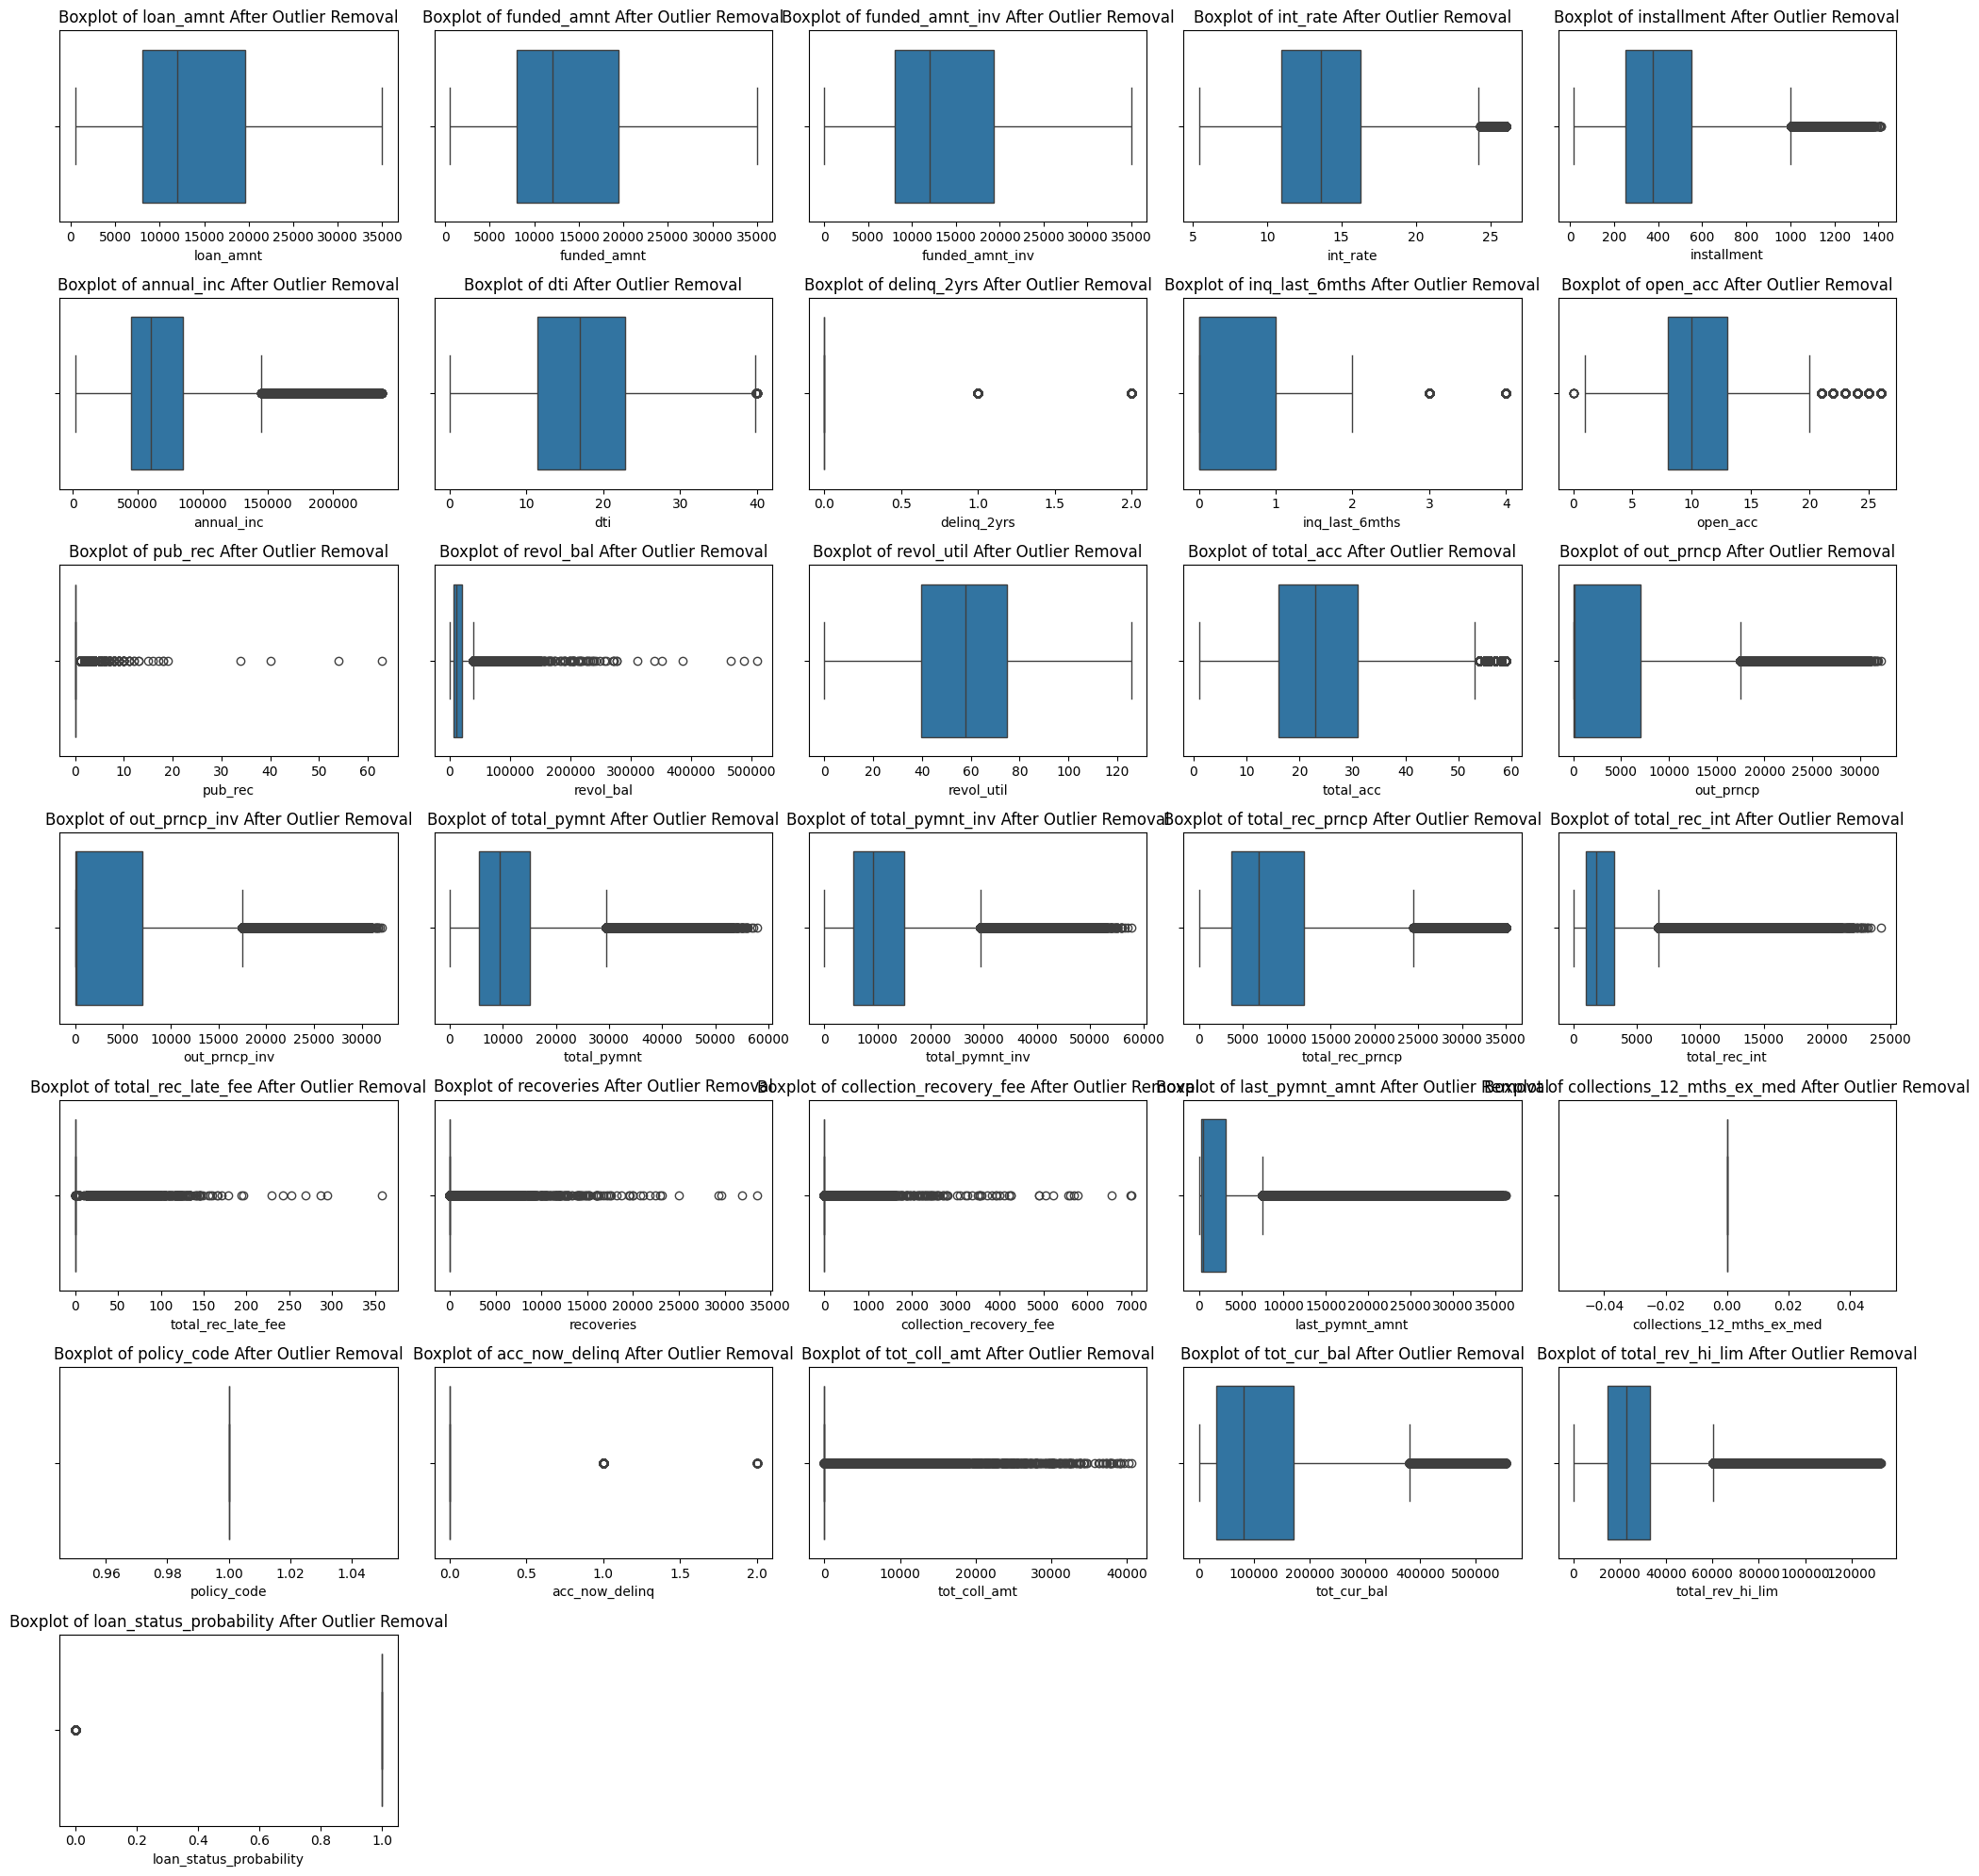

In [51]:
# Cek Outlier setelah outlier di hapus
num_columns_df2 = df2.select_dtypes(include=['float64', 'int64']).columns

# Membuat boxplot untuk setiap kolom numerik di df2
plt.figure(figsize=(20, 20))
for i, column in enumerate(num_columns_df2, 1):
    plt.subplot((len(num_columns_df2) + 4) // 5, 5, i)  # Mengatur jumlah subplot per baris
    sns.boxplot(x=df2[column])
    plt.title(f'Boxplot of {column} After Outlier Removal')
plt.tight_layout()
plt.show()

## 5.4 Feature Selection

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428230 entries, 0 to 466284
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   428230 non-null  int64  
 1   funded_amnt                 428230 non-null  int64  
 2   funded_amnt_inv             428230 non-null  float64
 3   term                        428230 non-null  object 
 4   int_rate                    428230 non-null  float64
 5   installment                 428230 non-null  float64
 6   grade                       428230 non-null  object 
 7   sub_grade                   428230 non-null  object 
 8   emp_length                  428230 non-null  object 
 9   home_ownership              428230 non-null  object 
 10  annual_inc                  428230 non-null  float64
 11  verification_status         428230 non-null  object 
 12  purpose                     428230 non-null  object 
 13  dti                

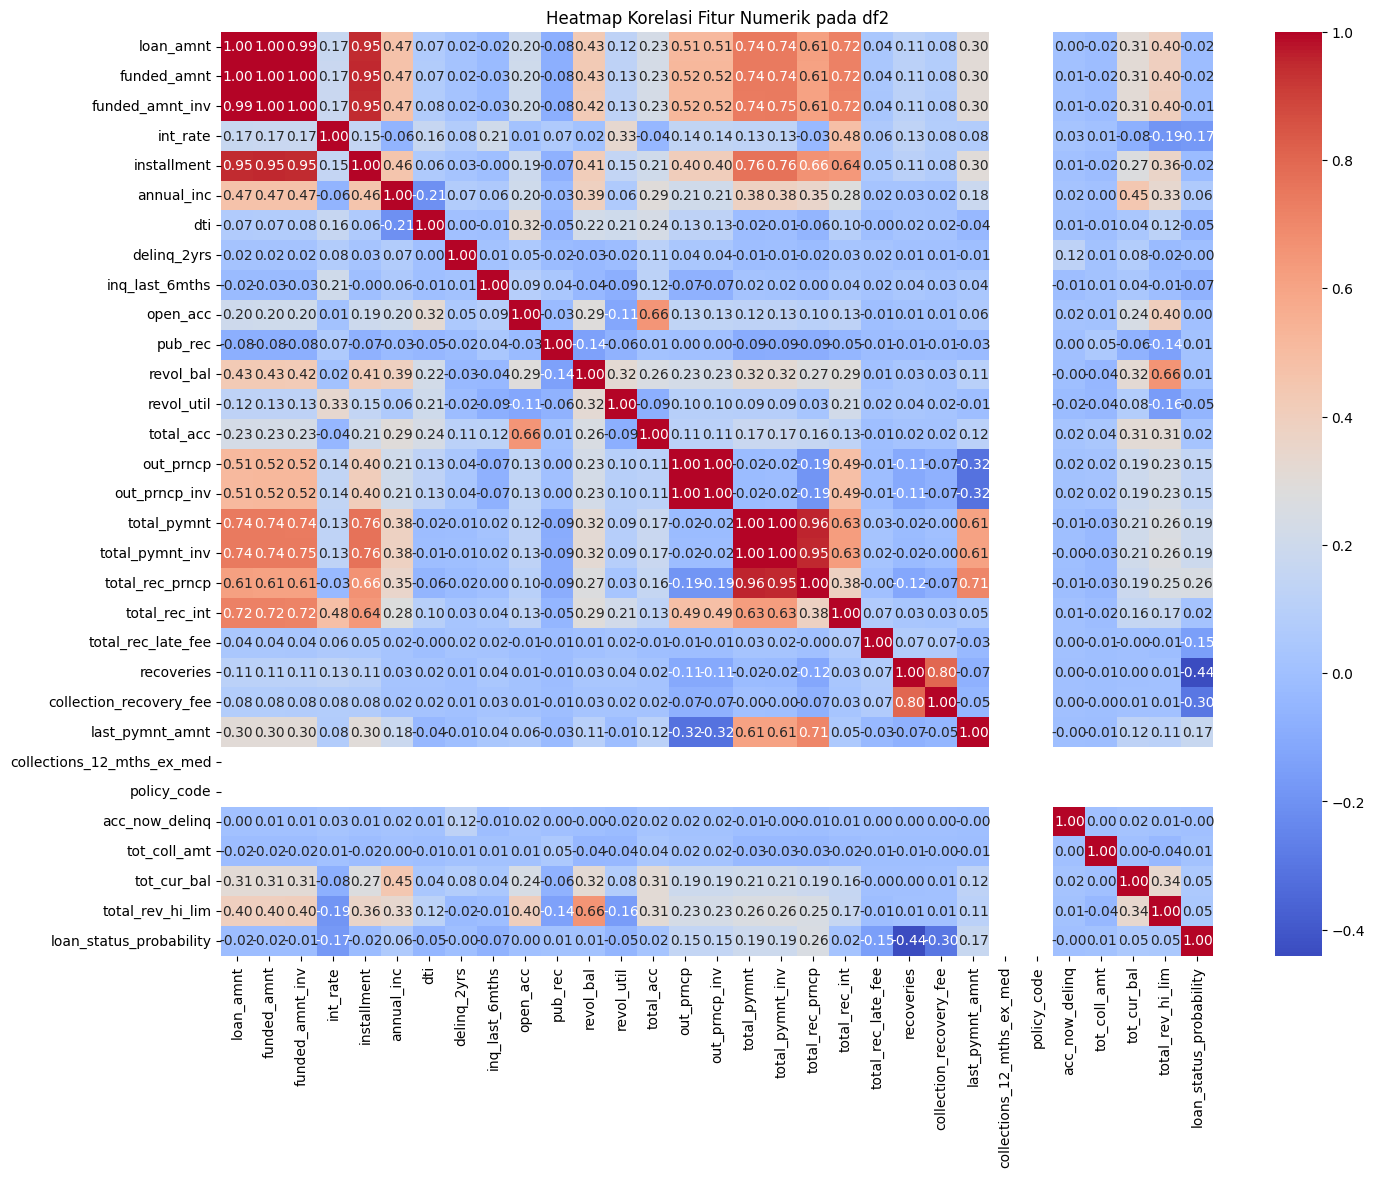

In [53]:
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi untuk df2 yang hanya berisi kolom numerik
corr_matrix_df2 = numeric_df2.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_df2, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap Korelasi Fitur Numerik pada df2')
plt.show()

In [54]:
corr_matrix_df2 = np.abs(corr_matrix_df2)

# Memilih segitiga atas dari matriks korelasi
mask = np.triu(np.ones(corr_matrix_df2.shape), k=1).astype(bool)
upper_triangle = corr_matrix_df2.where(mask)

# Menemukan kolom dengan korelasi lebih dari 0.7
to_drop_hicorr = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.7)]

# Menampilkan kolom yang akan dihapus
print("Kolom yang akan dihapus karena korelasi tinggi (>0.7):")
print(to_drop_hicorr)

Kolom yang akan dihapus karena korelasi tinggi (>0.7):
['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt']


In [55]:
# Drop kolom
to_drop_hicorr = [
    'funded_amnt', 'funded_amnt_inv', 'installment',
    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int',
    'collection_recovery_fee', 'last_pymnt_amnt'
]

# Menghapus kolom dari df2
df2_reduced = df2.drop(columns=to_drop_hicorr)

In [56]:
pd.set_option('display.max_columns', None)

# Menampilkan 5 sampel data dari df2_reduced
print(df2_reduced.sample(5))

        loan_amnt        term  int_rate grade sub_grade emp_length  \
260112      14950   60 months     15.99     D        D2  10+ years   
187271      22400   60 months     12.12     B        B3  10+ years   
76981       23000   60 months     16.20     C        C4  10+ years   
296362      20000   36 months     11.67     B        B4  10+ years   
175429      28000   36 months      8.90     A        A5  10+ years   

       home_ownership  annual_inc verification_status             purpose  \
260112       MORTGAGE     50000.0     Source Verified  debt_consolidation   
187271       MORTGAGE     85000.0            Verified  debt_consolidation   
76981        MORTGAGE     54000.0     Source Verified         credit_card   
296362       MORTGAGE     70575.0            Verified  debt_consolidation   
175429       MORTGAGE     90000.0            Verified  debt_consolidation   

          dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
260112  20.13          0.0             2

In [57]:
# Menghapus teks "months" dan mengonversi kolom 'term' menjadi integer
df2_reduced['term'] = df2_reduced['term'].str.replace(' months', '').astype(int)


In [58]:
# Fungsi untuk mengonversi emp_length menjadi integer
def convert_emp_length(emp_length):
    if emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    elif pd.isnull(emp_length):
        return np.nan
    else:
        return int(emp_length.split()[0])

df2_reduced['emp_length'] = df2_reduced['emp_length'].apply(convert_emp_length)

In [59]:
columns_to_check = [
    'collections_12_mths_ex_med', 'policy_code',
    'emp_length', 'open_acc', 'revol_bal',
    'delinq_2yrs', 'inq_last_6mths', 'tot_coll_amt',
    'acc_now_delinq', 'initial_list_status', 'verification_status',
    'total_rev_hi_lim'
]

# Melihat jumlah nilai unik pada kolom yang dipilih
for column in columns_to_check:
    print(f"Value counts for column '{column}':")
    print(df2_reduced[column].value_counts(dropna=False))  # dropna=False untuk menyertakan NaN dalam hitungan
    print("\n")

Value counts for column 'collections_12_mths_ex_med':
collections_12_mths_ex_med
0.0    428230
Name: count, dtype: int64


Value counts for column 'policy_code':
policy_code
1    428230
Name: count, dtype: int64


Value counts for column 'emp_length':
emp_length
10    155634
2      37934
3      33699
0      33546
5      28628
1      27256
4      25982
7      24256
6      24245
8      20619
9      16431
Name: count, dtype: int64


Value counts for column 'open_acc':
open_acc
9.0     41483
10.0    39733
8.0     39676
11.0    36413
7.0     35730
12.0    32056
6.0     29563
13.0    27387
14.0    22658
5.0     20739
15.0    18400
16.0    15199
4.0     12139
17.0    11994
18.0     9639
19.0     7545
20.0     5755
3.0      5310
21.0     4515
22.0     3409
23.0     2580
24.0     1922
2.0      1727
25.0     1529
26.0      985
1.0       137
0.0         7
Name: count, dtype: int64


Value counts for column 'revol_bal':
revol_bal
0        2070
4427       38
6223       37
5896       37
6510       3

In [60]:
# Drop kolom
columns_to_drop = [
    'collections_12_mths_ex_med', 'policy_code',
    'initial_list_status', 'total_rec_late_fee', 'recoveries',
    'delinq_2yrs', 'inq_last_6mths',
    'acc_now_delinq', 'tot_coll_amt',
    'total_rev_hi_lim',
    'sub_grade', 'grade', 'verification_status'
]

# Menghapus kolom dari df2_reduced
df2_reduced = df2_reduced.drop(columns=columns_to_drop)

In [87]:
df2_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428230 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                428230 non-null  int64  
 1   term                     428230 non-null  int64  
 2   int_rate                 428230 non-null  float64
 3   emp_length               428230 non-null  int64  
 4   home_ownership           428230 non-null  object 
 5   annual_inc               428230 non-null  float64
 6   purpose                  428230 non-null  object 
 7   dti                      428230 non-null  float64
 8   open_acc                 428230 non-null  float64
 9   pub_rec                  428230 non-null  float64
 10  revol_bal                428230 non-null  int64  
 11  revol_util               428230 non-null  float64
 12  total_acc                428230 non-null  float64
 13  out_prncp                428230 non-null  float64
 14  tot_cur_b

## 5.5 Feature Encoding

In [62]:
columns_to_check = [
    'purpose'
]

# Melihat jumlah nilai unik pada kolom yang dipilih
for column in columns_to_check:
    print(f"Value counts for column '{column}':")
    print(df2_reduced[column].value_counts(dropna=False))  # dropna=False untuk menyertakan NaN dalam hitungan
    print("\n")

Value counts for column 'purpose':
purpose
debt_consolidation    252352
credit_card            96366
home_improvement       23266
other                  21772
major_purchase          9015
small_business          6240
car                     5046
medical                 4176
moving                  2754
vacation                2321
wedding                 2214
house                   2013
educational              368
renewable_energy         327
Name: count, dtype: int64




In [63]:
# Melakukan One-Hot Encoding pada kolom 'purpose'
df2_encoded = pd.get_dummies(df2_reduced, columns=['purpose', 'home_ownership'], drop_first=True)

# Memeriksa dataset setelah encoding
df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428230 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   428230 non-null  int64  
 1   term                        428230 non-null  int64  
 2   int_rate                    428230 non-null  float64
 3   emp_length                  428230 non-null  int64  
 4   annual_inc                  428230 non-null  float64
 5   dti                         428230 non-null  float64
 6   open_acc                    428230 non-null  float64
 7   pub_rec                     428230 non-null  float64
 8   revol_bal                   428230 non-null  int64  
 9   revol_util                  428230 non-null  float64
 10  total_acc                   428230 non-null  float64
 11  out_prncp                   428230 non-null  float64
 12  tot_cur_bal                 428230 non-null  float64
 13  loan_status_probabi

## 5.6 Feature Transformation

In [64]:
numeric_columns = [
    'loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
    'dti', 'open_acc', 'pub_rec', 'revol_bal',
    'revol_util', 'total_acc', 'out_prncp', 'tot_cur_bal'
]

# Buat salinan dataset sebelum scaling
df2_scaled = df2_encoded.copy()

# Lakukan scaling menggunakan StandardScaler
scaler = StandardScaler()
df2_scaled[numeric_columns] = scaler.fit_transform(df2_scaled[numeric_columns])

In [65]:
df2_scaled[numeric_columns].describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,tot_cur_bal
count,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05,4.282300e+05
mean,-4.964491e-17,1.707373e-16,2.761000e-16,-9.358198e-17,1.112365e-16,-1.836463e-16,-1.375190e-16,9.822789e-18,3.199043e-17,6.669707e-16,5.309616e-17,1.208601e-16,4.539721e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.671927e+00,-6.126392e-01,-1.930337e+00,-1.692039e+00,-1.957479e+00,-2.205057e+00,-2.410524e+00,-3.193149e-01,-1.150332e+00,-2.396784e+00,-2.165436e+00,-6.859297e-01,-1.046757e+00
25%,-7.458547e-01,-6.126392e-01,-6.464044e-01,-8.673140e-01,-6.891722e-01,-7.441142e-01,-6.307516e-01,-3.193149e-01,-6.583032e-01,-7.081565e-01,-7.615572e-01,-6.859297e-01,-7.591823e-01
50%,-2.519494e-01,-6.126392e-01,-3.325154e-02,2.323191e-01,-2.478071e-01,-4.367988e-02,-1.858084e-01,-3.193149e-01,-2.573053e-01,5.978720e-02,-1.064139e-01,-6.665268e-01,-3.146991e-01
75%,6.833837e-01,1.632282e+00,5.752911e-01,1.057044e+00,4.878014e-01,7.088397e-01,4.816063e-01,-3.193149e-01,3.697263e-01,7.810603e-01,6.423213e-01,4.427238e-01,4.947558e-01
max,2.588006e+00,1.632282e+00,2.827360e+00,1.057044e+00,4.989726e+00,2.906325e+00,3.373737e+00,1.248224e+02,3.811328e+01,2.940637e+00,3.262895e+00,4.502423e+00,3.937689e+00


## 5.7 Splitting Dataset

In [110]:
df3 = df2_scaled.copy()

In [111]:
# Memisahkan fitur (X) dan target (y)
X = df3.drop(columns=['loan_status_probability'])
y = df3['loan_status_probability']

# Membagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Memeriksa ukuran dari setiap set
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (299761, 31)
Ukuran X_test: (128469, 31)
Ukuran y_train: (299761,)
Ukuran y_test: (128469,)


# 6. Data Modelling

## 6.1 Function

In [112]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Prediksi pada data training dan testing
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Prediksi probabilitas pada data training dan testing
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # Evaluasi Metrik Lainnya pada Test Set
    print('**Evaluation Metrics**')
    print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred_test), 4)}')
    print(f'Precision Score: {round(precision_score(y_test, y_pred_test), 4)}')
    print(f'Recall Score: {round(recall_score(y_test, y_pred_test), 4)}')
    print(f'F1 Score: {round(f1_score(y_test, y_pred_test), 4)}')
    print(f'ROC-AUC Score Train: {round(roc_auc_score(y_train, y_pred_proba_train), 6)}')
    print(f'ROC-AUC Score Test: {round(roc_auc_score(y_test, y_pred_proba_test), 6)}\n')

    # Confusion Matrix pada Test Set
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## 6.2 Logistic Regression

**Evaluation Metrics**
Accuracy Score: 0.8874
Precision Score: 0.8899
Recall Score: 0.9965
F1 Score: 0.9402
ROC-AUC Score Train: 0.746298
ROC-AUC Score Test: 0.748636



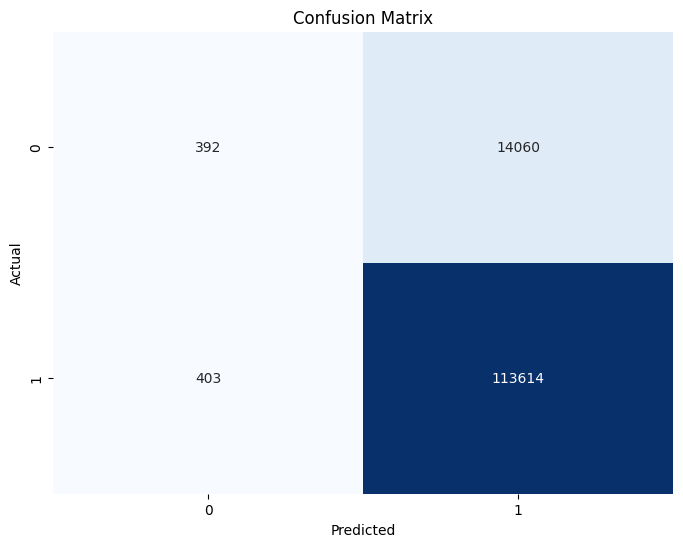

In [113]:
# Melatih model Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Evaluasi model Logistic Regression
evaluate_model(model_lr, X_train, y_train, X_test, y_test)

Analysis:
- Logistic Regression memberikan keseimbangan antara semua metrik.
- Recall sangat tinggi, menunjukkan bahwa model ini sangat baik dalam mengidentifikasi kelas positif.
- ROC-AUC yang relatif rendah menunjukkan bahwa model ini mungkin kurang bagus dalam membedakan antara kelas positif dan negatif.

## 6.3 Decision Tree

**Evaluation Metrics**
Accuracy Score: 0.8199
Precision Score: 0.9038
Recall Score: 0.892
F1 Score: 0.8979
ROC-AUC Score Train: 1.0
ROC-AUC Score Test: 0.571639



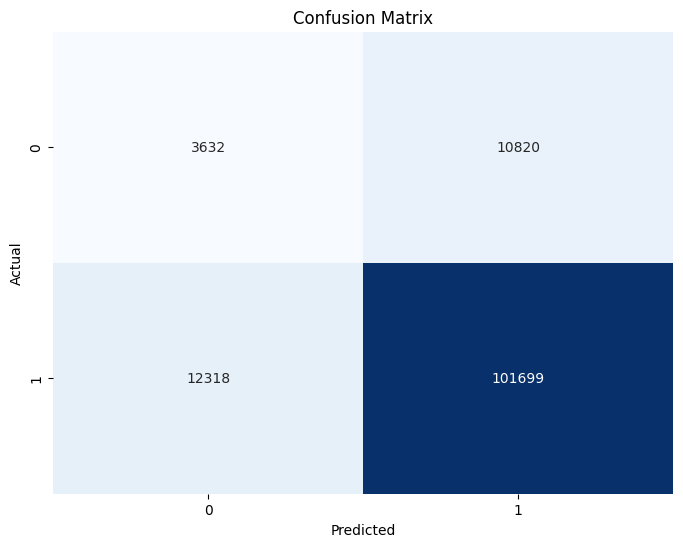

In [114]:
# Melatih model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Evaluasi model Decision Tree
evaluate_model(model_dt, X_train, y_train, X_test, y_test)

Analysis:
- Precision yang tinggi.
- Terjadi overfitting yang signifikan, terlihat dari perbedaan besar antara ROC-AUC pada training (1.0) dan testing (0.5678). Ini menunjukkan bahwa model tidak generalisasi dengan baik pada data baru.

## 6.4 Random Forest

**Evaluation Metrics**
Accuracy Score: 0.8874
Precision Score: 0.8911
Recall Score: 0.9946
F1 Score: 0.94
ROC-AUC Score Train: 1.0
ROC-AUC Score Test: 0.773171



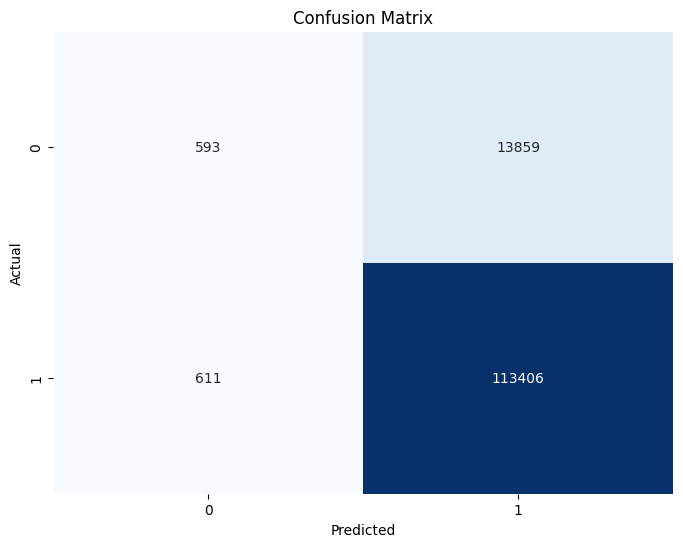

In [115]:
# Melatih model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Evaluasi model Random Forest
evaluate_model(model_rf, X_train, y_train, X_test, y_test)

Analysis:
- Random Forest menawarkan keseimbangan yang baik antara precision dan recall.
- ROC-AUC Test cukup baik.
- Terdapat overfitting pada data.

## 6.6 XGBoost

**Evaluation Metrics**
Accuracy Score: 0.8874
Precision Score: 0.8923
Recall Score: 0.9929
F1 Score: 0.9399
ROC-AUC Score Train: 0.839089
ROC-AUC Score Test: 0.792434



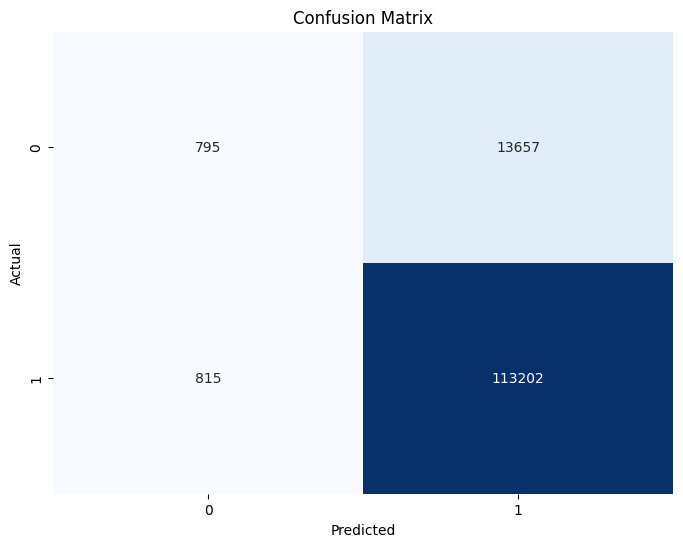

In [116]:
# Melatih model XGBoost
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model_xgb.fit(X_train, y_train)

# Evaluasi model XGBoost
evaluate_model(model_xgb, X_train, y_train, X_test, y_test)

Analysis:
- XGBoost menunjukkan performa keseluruhan yang baik dengan ROC-AUC Test yang cukup tinggi.
- Accuracy dan Precision yang bagus.
- Recall yang sangat tinggi, menunjukkan bahwa model ini sangat baik dalam mengidentifikasi kelas positif.

## 6.7 LightGBM

[LightGBM] [Info] Number of positive: 266041, number of negative: 33720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 299761, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.887510 -> initscore=2.065559
[LightGBM] [Info] Start training from score 2.065559
**Evaluation Metrics**
Accuracy Score: 0.8879
Precision Score: 0.8907
Recall Score: 0.9959
F1 Score: 0.9403
ROC-AUC Score Train: 0.810489
ROC-AUC Score Test: 0.793751



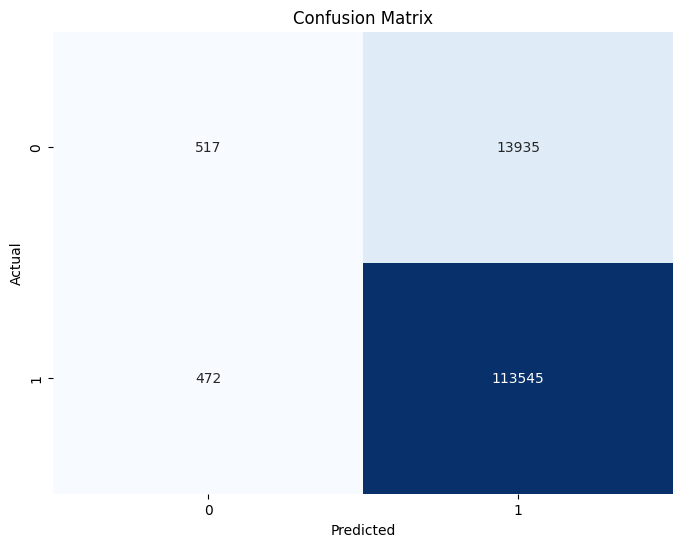

In [117]:
# Melatih model LightGBM
model_lgbm = LGBMClassifier(random_state=42)
model_lgbm.fit(X_train, y_train)

# Evaluasi model LightGBM
evaluate_model(model_lgbm, X_train, y_train, X_test, y_test)

Analysis:
- LightGBM menunjukkan performa yang kuat dengan ROC-AUC Test yang tinggi.
- Accuracy dan Precision yang bagus
- Recall yang sangat tinggi, menunjukkan bahwa model ini sangat baik dalam mengidentifikasi kelas positif.

**Recomendation:**
  - **XGBoost** dan **LightGBM** adalah model yang paling direkomendasikan berdasarkan evaluasi keseluruhan, terutama karena model tersebut menawarkan keseimbangan yang baik antara akurasi, presisi, recall, dan ROC-AUC score. Kedua model ini mampu menangani dataset besar dan kompleks dengan baik.
  - **Logistic Regression** bisa menjadi alternatif  mencari model yang lebih sederhana dan mudah diinterpretasikan, terutama jika recall adalah prioritas utama.

# 7. Hyperparameter Tunning

- Hyperparameter Tunning akan dilakukan pada 3 model rekomendasi, yaitu Logistic Regression, XGBoost, dan LigghtGBM

## 7.1 Function

In [118]:
from sklearn.model_selection import GridSearchCV

def tune_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    # Setup the GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

    # Fit the GridSearch to the data
    grid_search.fit(X_train, y_train)

    # Best parameters and best score
    print(f"Best parameters found for {model.__class__.__name__}:", grid_search.best_params_)
    print(f"Best ROC-AUC score for {model.__class__.__name__}:", grid_search.best_score_)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    evaluate_model(best_model, X_train, y_train, X_test, y_test)

    return best_model


## 7.2 Logistic Regression

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found for LogisticRegression: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC score for LogisticRegression: 0.7460811541645122
**Evaluation Metrics**
Accuracy Score: 0.8874
Precision Score: 0.8899
Recall Score: 0.9965
F1 Score: 0.9402
ROC-AUC Score Train: 0.746298
ROC-AUC Score Test: 0.748637



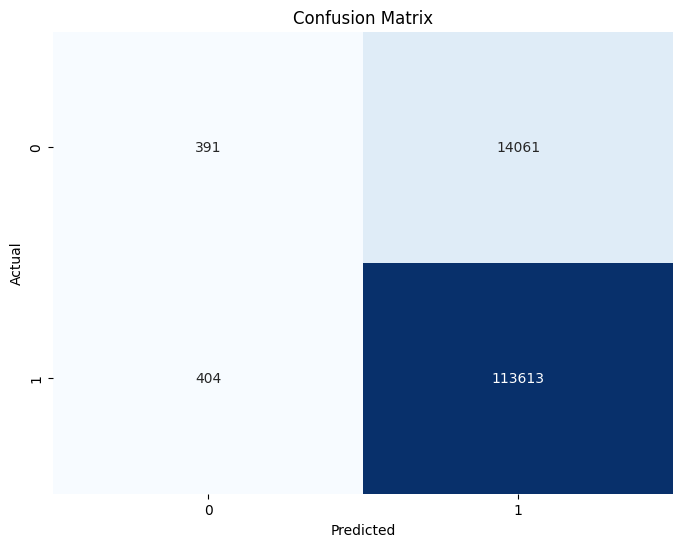

In [119]:
# Parameter grid untuk Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200]
}

# Initialize the Logistic Regression model
model_logreg = LogisticRegression(random_state=42)

# Tuning dan evaluasi untuk Logistic Regression
best_logreg_model = tune_and_evaluate_model(model_logreg, param_grid_logreg, X_train, y_train, X_test, y_test)


Insights:
  - Akurasi & Presisi: Logistic Regression menunjukkan akurasi dan presisi yang solid dengan nilai masing-masing sebesar 0.8875 dan 0.8889. Hal ini menunjukkan bahwa model ini memiliki keseimbangan yang baik antara prediksi benar dan salah dalam hal kasus positif.

  - Recall: Recall untuk Logistic Regression sangat tinggi di 0.998, yang berarti model ini hampir tidak melewatkan kasus positif (default). Ini sangat penting dalam konteks risiko kredit, di mana meminimalkan "false negatives" sangat diutamakan.

  - ROC-AUC: ROC-AUC pada training set dan test set menunjukkan hasil yang konsisten, dengan sedikit perbedaan (0.746472 vs 0.748724). Ini menunjukkan bahwa Logistic Regression cenderung lebih stabil dan kurang rentan terhadap overfitting dibandingkan model lain.

## 7.3 XGBoost

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found for XGBClassifier: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best ROC-AUC score for XGBClassifier: 0.7904729677078235
**Evaluation Metrics**
Accuracy Score: 0.8879
Precision Score: 0.8912
Recall Score: 0.9952
F1 Score: 0.9403
ROC-AUC Score Train: 0.813216
ROC-AUC Score Test: 0.792093



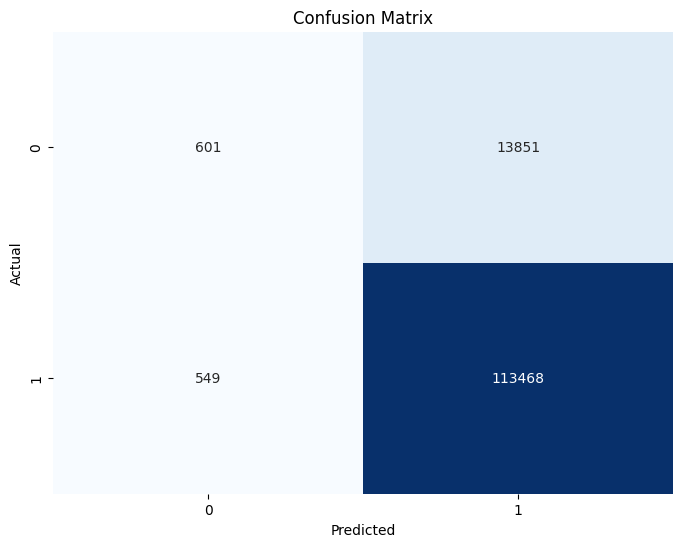

In [120]:
# Parameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Tuning dan evaluasi untuk XGBoost
best_xgb_model = tune_and_evaluate_model(model_xgb, param_grid_xgb, X_train, y_train, X_test, y_test)


Insights:
  - Akurasi & Presisi: XGBoost juga menunjukkan performa akurasi yang baik (0.8879) dan presisi (0.8912). Model ini seimbang dalam menangani prediksi positif dan negatif.

  - Recall: XGBoost menunjukkan recall yang sedikit lebih rendah dibandingkan Logistic Regression di 0.9952, tetapi masih sangat baik. Ini berarti model ini efektif dalam mengidentifikasi kasus-kasus positif dengan tingkat yang sangat tinggi.

  - ROC-AUC: XGBoost memberikan skor ROC-AUC yang lebih tinggi baik pada training set (0.813216) maupun test set (0.792093). Ini menunjukkan kemampuan diskriminatif yang kuat dalam memisahkan kelas positif dan negatif, yang membuatnya lebih unggul dalam konteks prediksi risiko.

## 7.4 LightGBM

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[LightGBM] [Info] Number of positive: 266041, number of negative: 33720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 299761, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.887510 -> initscore=2.065559
[LightGBM] [Info] Start training from score 2.065559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

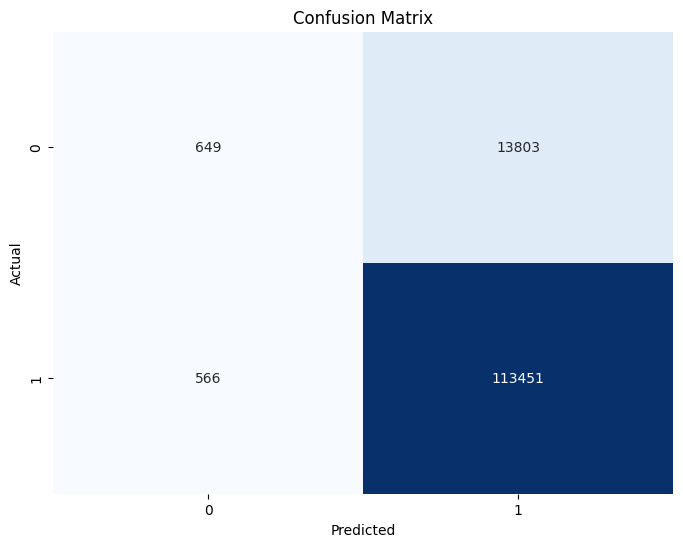

In [121]:
# Parameter grid untuk LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'num_leaves': [31, 50],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the LightGBM model
model_lgbm = LGBMClassifier(random_state=42)

# Tuning dan evaluasi untuk LightGBM
best_lgbm_model = tune_and_evaluate_model(model_lgbm, param_grid_lgbm, X_train, y_train, X_test, y_test)


Insights:
  - Akurasi & Presisi: LightGBM memiliki akurasi tertinggi di antara ketiga model, yaitu 0.8882, dan presisi sebesar 0.8915. Model ini sedikit lebih unggul dalam hal akurasi, menunjukkan bahwa lebih sedikit kesalahan dalam prediksi secara keseluruhan.

  - Recall: Recall dari LightGBM juga sangat tinggi di 0.995, yang berarti bahwa seperti XGBoost, model ini sangat efisien dalam mendeteksi kasus positif.

  - ROC-AUC: LightGBM memberikan ROC-AUC yang paling tinggi di antara ketiga model pada test set (0.795082). Hal ini menunjukkan bahwa LightGBM mungkin adalah model terbaik dalam memisahkan kelas positif dan negatif, memberikan keseimbangan yang baik antara recall dan kemampuan diskriminatif.

Rekomendasi:

  - Logistic Regression adalah pilihan yang baik jika fokus utama adalah memastikan bahwa hampir semua kasus positif teridentifikasi (meminimalkan "false negatives"). Ini sangat berguna jika Anda ingin lebih berhati-hati dalam memprediksi risiko.
  - XGBoost dan LightGBM memberikan performa keseluruhan yang sangat baik dan cenderung lebih kuat dalam membedakan antara kelas positif dan negatif (nilai ROC-AUC yang lebih tinggi). Ini berarti mereka cocok untuk situasi di mana pemisahan yang lebih baik antara kelas diperlukan, misalnya untuk analisis yang lebih mendalam dan segmentasi nasabah.

# 8. Evaluation

## 8.1 Data testing Evaluation

In [122]:
from sklearn.metrics import confusion_matrix, roc_auc_score

def dataframe_to_plot(model, title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()

    accuracy = round(((tp + tn) / (tn + tp + fn + fp)), 4)
    recall = round((tp / (fn + tp)), 4)
    precision = round((tp / (tp + fp)), 4)
    f1 = round((2 * (1 / ((1 / precision) + (1 / recall)))), 4)

    evaluation_df = pd.DataFrame(data=[roc_auc_score(y_train, model.predict_proba(X_train)[:,1]),
                                       roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
                                       recall, precision, f1, accuracy],
                                 columns=[title],
                                 index=["AUC-Proba Train", "AUC-Proba Test", "Recall", "Precision", "F1", "Accuracy"])
    return evaluation_df


In [123]:
# Confusion Matrices
logreg_cm = confusion_matrix(y_test, best_logreg_model.predict(X_test))
xgboost_cm = confusion_matrix(y_test, best_xgb_model.predict(X_test))
lgbm_cm = confusion_matrix(y_test, best_lgbm_model.predict(X_test))

# Membuat DataFrames untuk setiap model
logreg_df = dataframe_to_plot(best_logreg_model, 'Tuned Logistic Regression', logreg_cm)
xgboost_df = dataframe_to_plot(best_xgb_model, 'Tuned XGBoost', xgboost_cm)
lgbm_df = dataframe_to_plot(best_lgbm_model, 'Tuned LGBM', lgbm_cm)


In [124]:
# Menggabungkan semua DataFrames menjadi satu
df_models = round(pd.concat([logreg_df, xgboost_df, lgbm_df], axis=1), 4)


In [125]:
# Menampilkan tabel
display(df_models)

,Tuned Logistic Regression,Tuned XGBoost,Tuned LGBM
AUC-Proba Train,0.7463,0.8132,0.8153
AUC-Proba Test,0.7486,0.7921,0.7951
Recall,0.9965,0.9952,0.9950
Precision,0.8899,0.8912,0.8915
F1,0.9402,0.9403,0.9404
Accuracy,0.8874,0.8879,0.8882


## 8.2 Feature Importance

<Figure size 1000x800 with 0 Axes>

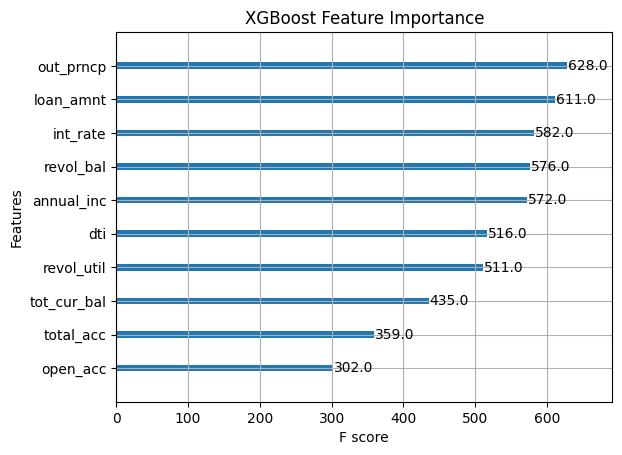

In [126]:
from xgboost import plot_importance

# Plot feature importance untuk XGBoost
plt.figure(figsize=(10, 8))
plot_importance(best_xgb_model, max_num_features=10, importance_type='weight')
plt.title('XGBoost Feature Importance')
plt.show()


<Figure size 1000x800 with 0 Axes>

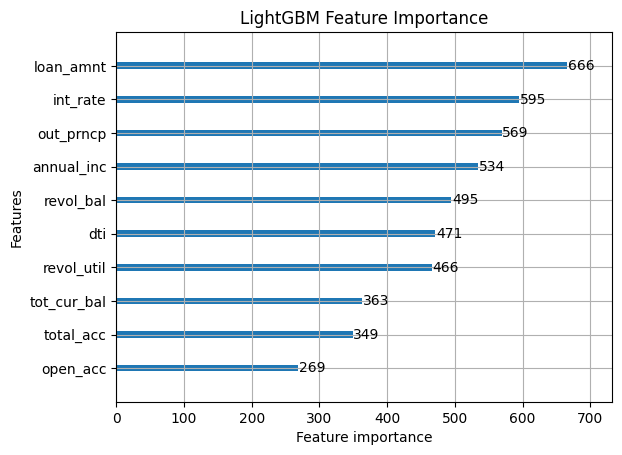

In [127]:
import lightgbm as lgb

# Plot feature importance untuk LightGBM
plt.figure(figsize=(10, 8))
lgb.plot_importance(best_lgbm_model, max_num_features=10, importance_type='split')
plt.title('LightGBM Feature Importance')
plt.show()


## 8.3 SHAP

In [128]:
pip install shap


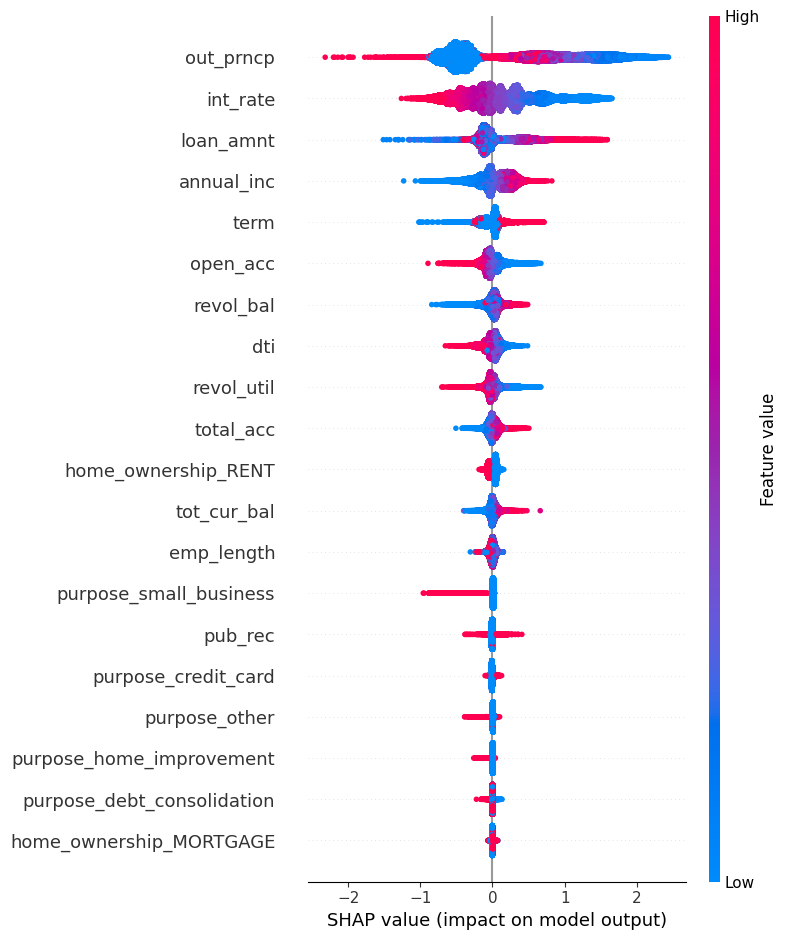

In [129]:
import shap

# Buat explainer menggunakan model yang sudah dituning
explainer = shap.TreeExplainer(best_xgb_model)

# Hitung nilai SHAP untuk data uji
shap_values = explainer.shap_values(X_test)

# Buat SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="dot")


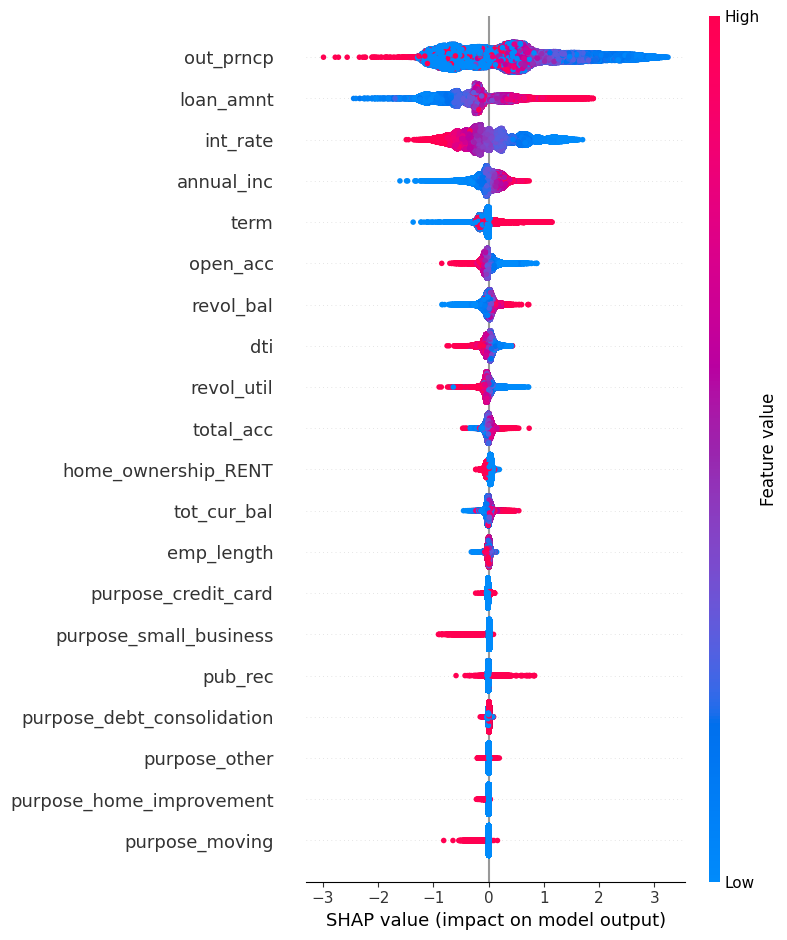

In [130]:
import shap

# Buat explainer menggunakan model yang sudah dituning
explainer = shap.TreeExplainer(best_lgbm_model)

# Hitung nilai SHAP untuk data uji
shap_values = explainer.shap_values(X_test)

# Buat SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="dot")


**Analysis:**

**out_prncp**

- out_prncp adalah total outstanding principal atau jumlah pokok pinjaman yang belum dilunasi oleh peminjam pada saat evaluasi.

- Semakin tinggi jumlah pokok pinjaman yang belum dilunasi, semakin besar risiko bahwa peminjam mungkin menghadapi kesulitan dalam melunasi sisa pinjaman tersebut. Hal ini bisa mengindikasikan potensi default yang lebih tinggi jika peminjam tidak mampu memenuhi kewajiban pembayaran.

- **Recommendation:**
  - Perusahaan pemberi pinjaman sebaiknya memperkuat monitoring terhadap pokok pinjaman yang masih tersisa dan melakukan intervensi dini jika ada indikasi peminjam mengalami kesulitan keuangan. Misalnya, bisa dilakukan komunikasi proaktif untuk menawarkan restrukturisasi atau perpanjangan jangka waktu pinjaman agar peminjam lebih mudah dalam melunasi kewajibannya.

**int_rate**

- int_rate adalah tingkat suku bunga yang dikenakan pada pinjaman.

- Semakin tinggi suku bunga yang dibebankan kepada peminjam, semakin besar beban keuangan yang harus ditanggung peminjam, yang dapat meningkatkan risiko gagal bayar. Tingkat suku bunga yang tinggi biasanya diberikan kepada peminjam dengan profil risiko lebih tinggi.

- **Recommendation:**
  - Perusahaan dapat mempertimbangkan untuk menawarkan program refinancing kepada peminjam yang telah menunjukkan sejarah pembayaran yang baik meskipun pada awalnya dikenakan suku bunga yang tinggi. Ini tidak hanya akan membantu dalam menjaga loyalitas peminjam, tetapi juga mengurangi risiko gagal bayar akibat beban bunga yang terlalu tinggi.

**loan_amnt**

- loan_amnt adalah jumlah total pinjaman yang diberikan kepada peminjam.

- Jumlah pinjaman yang lebih besar sering kali dikaitkan dengan risiko yang lebih tinggi, karena peminjam harus mengelola kewajiban yang lebih besar. Namun, di beberapa kasus, pinjaman yang lebih kecil dapat menunjukkan risiko tinggi jika peminjam berada dalam kondisi keuangan yang tidak stabil.

- **Recommendation:**
  - Perusahaan pemberi pinjaman sebaiknya tidak hanya berfokus pada jumlah pinjaman yang diberikan, tetapi juga mengevaluasi tujuan penggunaan pinjaman dan kemampuan peminjam untuk mengelola kewajiban tersebut. Selain itu, analisis lebih mendalam terhadap profil peminjam dengan pinjaman kecil namun risiko tinggi dapat membantu dalam pengelolaan risiko yang lebih baik.

**annual_inc**

- annual_inc adalah pendapatan tahunan yang dilaporkan oleh peminjam.

- Pendapatan tahunan yang lebih tinggi biasanya menunjukkan kapasitas keuangan yang lebih baik, yang berarti risiko default lebih rendah. Namun, penting untuk memastikan bahwa pendapatan ini stabil dan bukan bersifat sementara.

- **Recommendation:**
  - Perusahaan bisa meningkatkan penilaian risiko dengan memverifikasi sumber pendapatan peminjam, serta mempertimbangkan faktor-faktor seperti stabilitas pekerjaan dan sejarah pendapatan dalam beberapa tahun terakhir. Ini dapat membantu dalam memberikan gambaran yang lebih akurat mengenai kemampuan peminjam untuk melunasi pinjaman.

**open_acc**

- open_acc adalah jumlah akun kredit yang masih terbuka atau aktif.

- Semakin banyak akun kredit yang aktif, semakin tinggi risiko pengelolaan utang yang buruk oleh peminjam, yang dapat meningkatkan risiko gagal bayar. Ini bisa terjadi karena beban finansial yang meningkat seiring dengan bertambahnya jumlah akun yang perlu dilayani.

- **Recommendation:**
  - Perusahaan pemberi pinjaman sebaiknya memperhatikan jumlah akun terbuka saat menilai risiko kredit. Menawarkan program konsolidasi utang bagi peminjam dengan banyak akun kredit dapat membantu mengurangi beban keuangan mereka dan mengurangi risiko default.

**term**

- term adalah jangka waktu atau durasi pinjaman.

- Jangka waktu yang lebih lama dapat meningkatkan risiko default karena perubahan dalam situasi keuangan peminjam selama periode tersebut. Semakin panjang jangka waktu, semakin besar peluang bagi kondisi keuangan peminjam untuk berubah, baik menjadi lebih baik atau lebih buruk.

- **Recommendation:**
  - Perusahaan pemberi pinjaman bisa menawarkan fleksibilitas dalam jangka waktu pinjaman, dengan memberikan opsi kepada peminjam untuk memperpendek atau memperpanjang jangka waktu sesuai dengan kemampuan mereka. Selain itu, melakukan evaluasi berkala terhadap kondisi keuangan peminjam yang memiliki pinjaman jangka panjang bisa membantu dalam mengidentifikasi potensi risiko sebelum menjadi masalah.